#Loantap: Logistic Regression

* **Context:**<br><br>
LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.
<br><br>
The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.
<br><br>
LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

>- Personal Loan
- EMI Free Loan
- Personal Overdraft
- Advance Salary Loan

- This case study will focus on the underwriting process behind **Personal Loan** only.
<br><br>
* **Problem Statement:**
Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

* **Data Dictionary:**
1. `loan_amnt`: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
2. `term`: The number of payments on the loan. Values are in months and can be either 36 or 60.
3. `int_rate`: Interest Rate on the loan
4. `installment`: The monthly payment owed by the borrower if the loan originates.
5. `grade`: LoanTap assigned loan grade
6. `sub_grade`: LoanTap assigned loan subgrade
7. `emp_title`: The job title supplied by the Borrower when applying for the loan.
8. `emp_length`: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
9. `home_ownership`: The home ownership status provided by the borrower during registration or obtained from the credit report.
10. `annual_inc`: The self-reported annual income provided by the borrower during registration.
11. `verification_status`: Indicates if income was verified by LoanTap, not verified, or if the income source was verified
12. `issue_d`: The month which the loan was funded
13. `loan_status`: Current status of the loan - **Target Variable**
14. `purpose`: A category provided by the borrower for the loan request.
15. `title`: The loan title provided by the borrower
16. `dti`: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
17. `earliest_cr_line`: The month the borrower's earliest reported credit line was opened
18. `open_acc`: The number of open credit lines in the borrower's credit file.
19. `pub_rec`: Number of derogatory public records
20. `revol_bal`: Total credit revolving balance
21. `revol_util`: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
22. `total_acc`: The total number of credit lines currently in the borrower's credit file
23. `initial_list_status`: The initial listing status of the loan. Possible values are – W, F
24. `application_type`: Indicates whether the loan is an individual application or a joint application with two co-borrowers
25. `mort_acc`: Number of mortgage accounts.
26. `pub_rec_bankruptcies`: Number of public record bankruptcies
27. `Address`: Address of the individual


Let us import the dataset and do Exploratory Data Analysis, Feature Engineering and Preprocessing in order to prepare the same to train the Logistic Regression model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [2]:
!gdown 1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d

Downloading...
From: https://drive.google.com/uc?id=1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d
To: /content/logistic_regression.csv
100% 100M/100M [00:00<00:00, 102MB/s] 


In [3]:
loantap = pd.read_csv('logistic_regression.csv')

In [4]:
loantap.shape

(396030, 27)

In [5]:
loantap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
loantap.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [7]:
loantap_backup = loantap.copy(deep = True)

* Duplicate Value Check

In [8]:
loantap.duplicated().any()

False

* Statistical Description of the Features

In [9]:
loantap.describe().round(2)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,395754.00,396030.00,358235.00,395495.00
mean,14113.89,13.64,431.85,74203.18,17.38,11.31,0.18,15844.54,53.79,25.41,1.81,0.12
std,8357.44,4.47,250.73,61637.62,18.02,5.14,0.53,20591.84,24.45,11.89,2.15,0.36
min,500.00,5.32,16.08,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00
25%,8000.00,10.49,250.33,45000.00,11.28,8.00,0.00,6025.00,35.80,17.00,0.00,0.00
50%,12000.00,13.33,375.43,64000.00,16.91,10.00,0.00,11181.00,54.80,24.00,1.00,0.00
75%,20000.00,16.49,567.30,90000.00,22.98,14.00,0.00,19620.00,72.90,32.00,3.00,0.00
max,40000.00,30.99,1533.81,8706582.00,9999.00,90.00,86.00,1743266.00,892.30,151.00,34.00,8.00


In [10]:
loantap.describe(include = 'object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394275,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48817,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


* Heatmap showing Correlation amongst different Features

<Axes: >

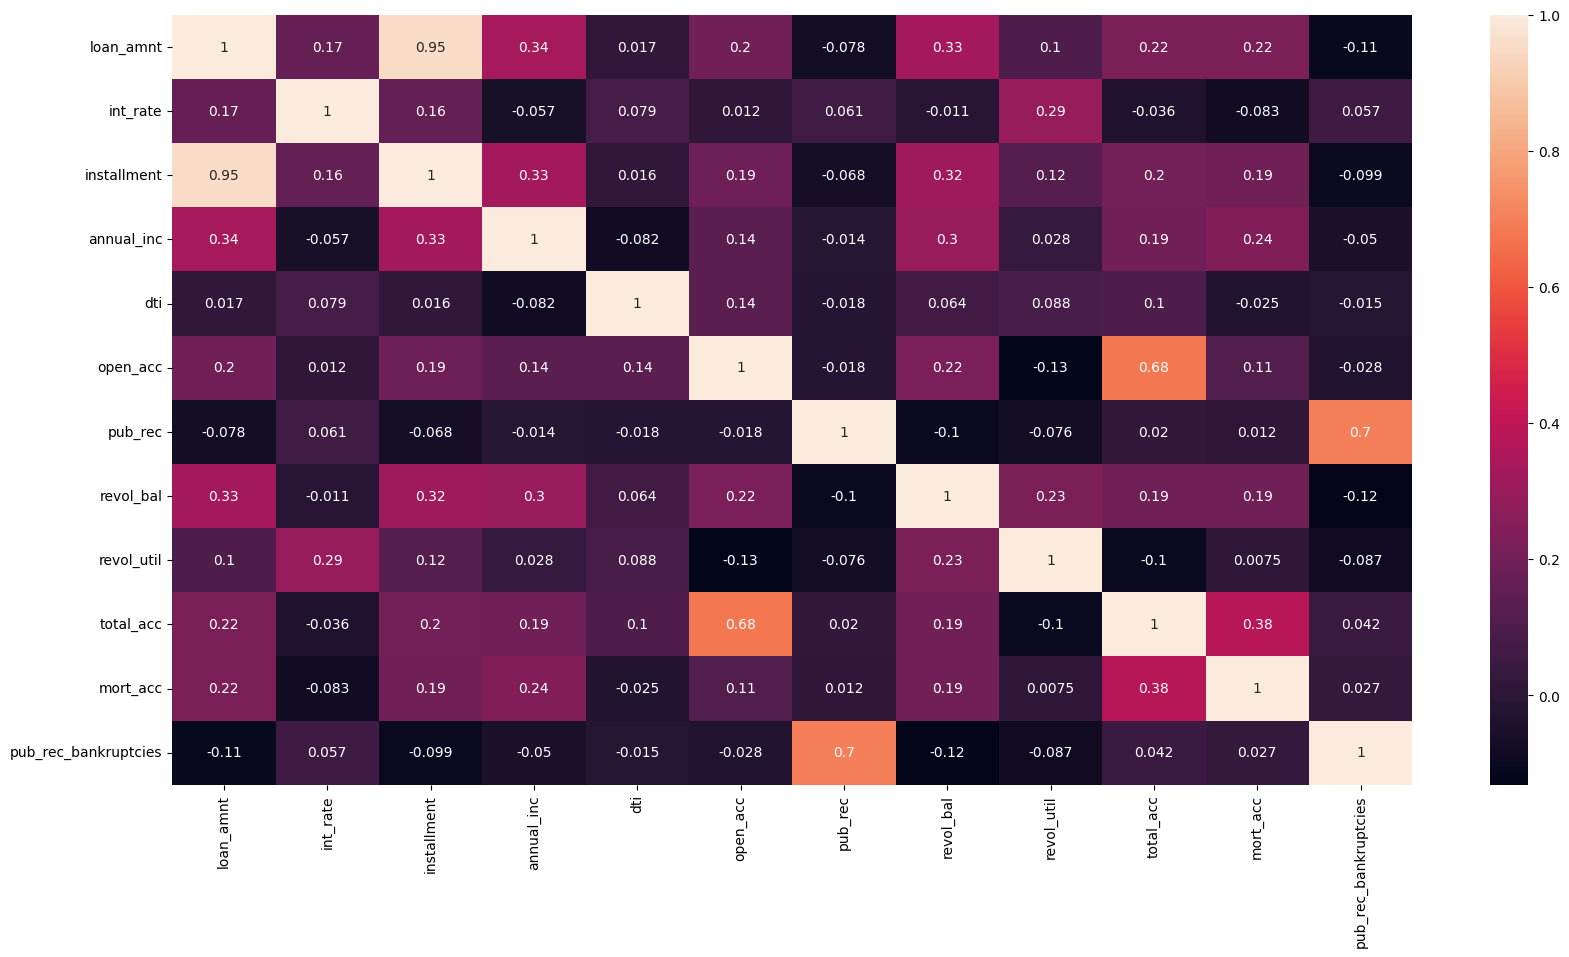

In [11]:
plt.figure(figsize = (20, 10))
sns.heatmap(data = loantap.corr(), annot = True)

Observation: The correlation coefficient between loan_amnt and installment is 0.957704.
This indicates a strong positive correlation between the two features.

* Missing Value Check

In [12]:
def missing_data(df):
  absolute_missing = df.isnull().sum().sort_values(ascending = False)
  percentage_missing = np.round((df.isnull().sum() / df.shape[0] * 100), 2).sort_values(ascending = False)
  missing_dataframe = pd.concat([absolute_missing, percentage_missing], axis = 1, keys = ['Total Count', 'Percentage'])
  return missing_dataframe[missing_dataframe['Total Count'] > 0]

In [13]:
missing_data(loantap)

,Total Count,Percentage
mort_acc,37795,9.54
emp_title,22927,5.79
emp_length,18301,4.62
title,1755,0.44
pub_rec_bankruptcies,535,0.14
revol_util,276,0.07


* **Observations:**

1. There are **3,96,030 rows** *(entries)* and **27 columns** *(features)* in the dataset.
2. `loan_amnt`, `int_rate`, `installment`, `annual_inc`, `dti`, `open_acc`, `pub_acc`, `revol_bal`, `revol_util`, `mort_acc` and `pub_rec_bankruptcies` are clearly **numerical** variables ; 'issue_d`, 'earliest_cr_line` are **datetime** objects and rest variables are **categorical**.
3. `loan_status` is the **target variable** and rest are independent variables.
4. There is **no duplicate values** in the dataset.
5. `loan_amnt` has a range of 500 to 40,000 with a mean of 14,113.89 and median of 12,000.
6. Borrowers' **Annual Incomes** (`annual_inc`) have a wide range from 0 to 87,06,582.00 with mean and median worth 74,203.18 and 64,000 respectively.
7. **Debt-to-Income Ratio** (`dti`) has a very wide range from 0 to 9999. Mean and median of the same are 17.38 and 16.91 respectively.
8. `loan_amnt` and `installment` has a **very high correlation (0.95)**, i.e. they are highly dependent on each other.
9. There are 6 features having missing values, while `mort_acc` has highest count (9.54%) ; `emp_title` and `emp_length` are having 5.79% and 4.62% respectively.

* Outlier Check

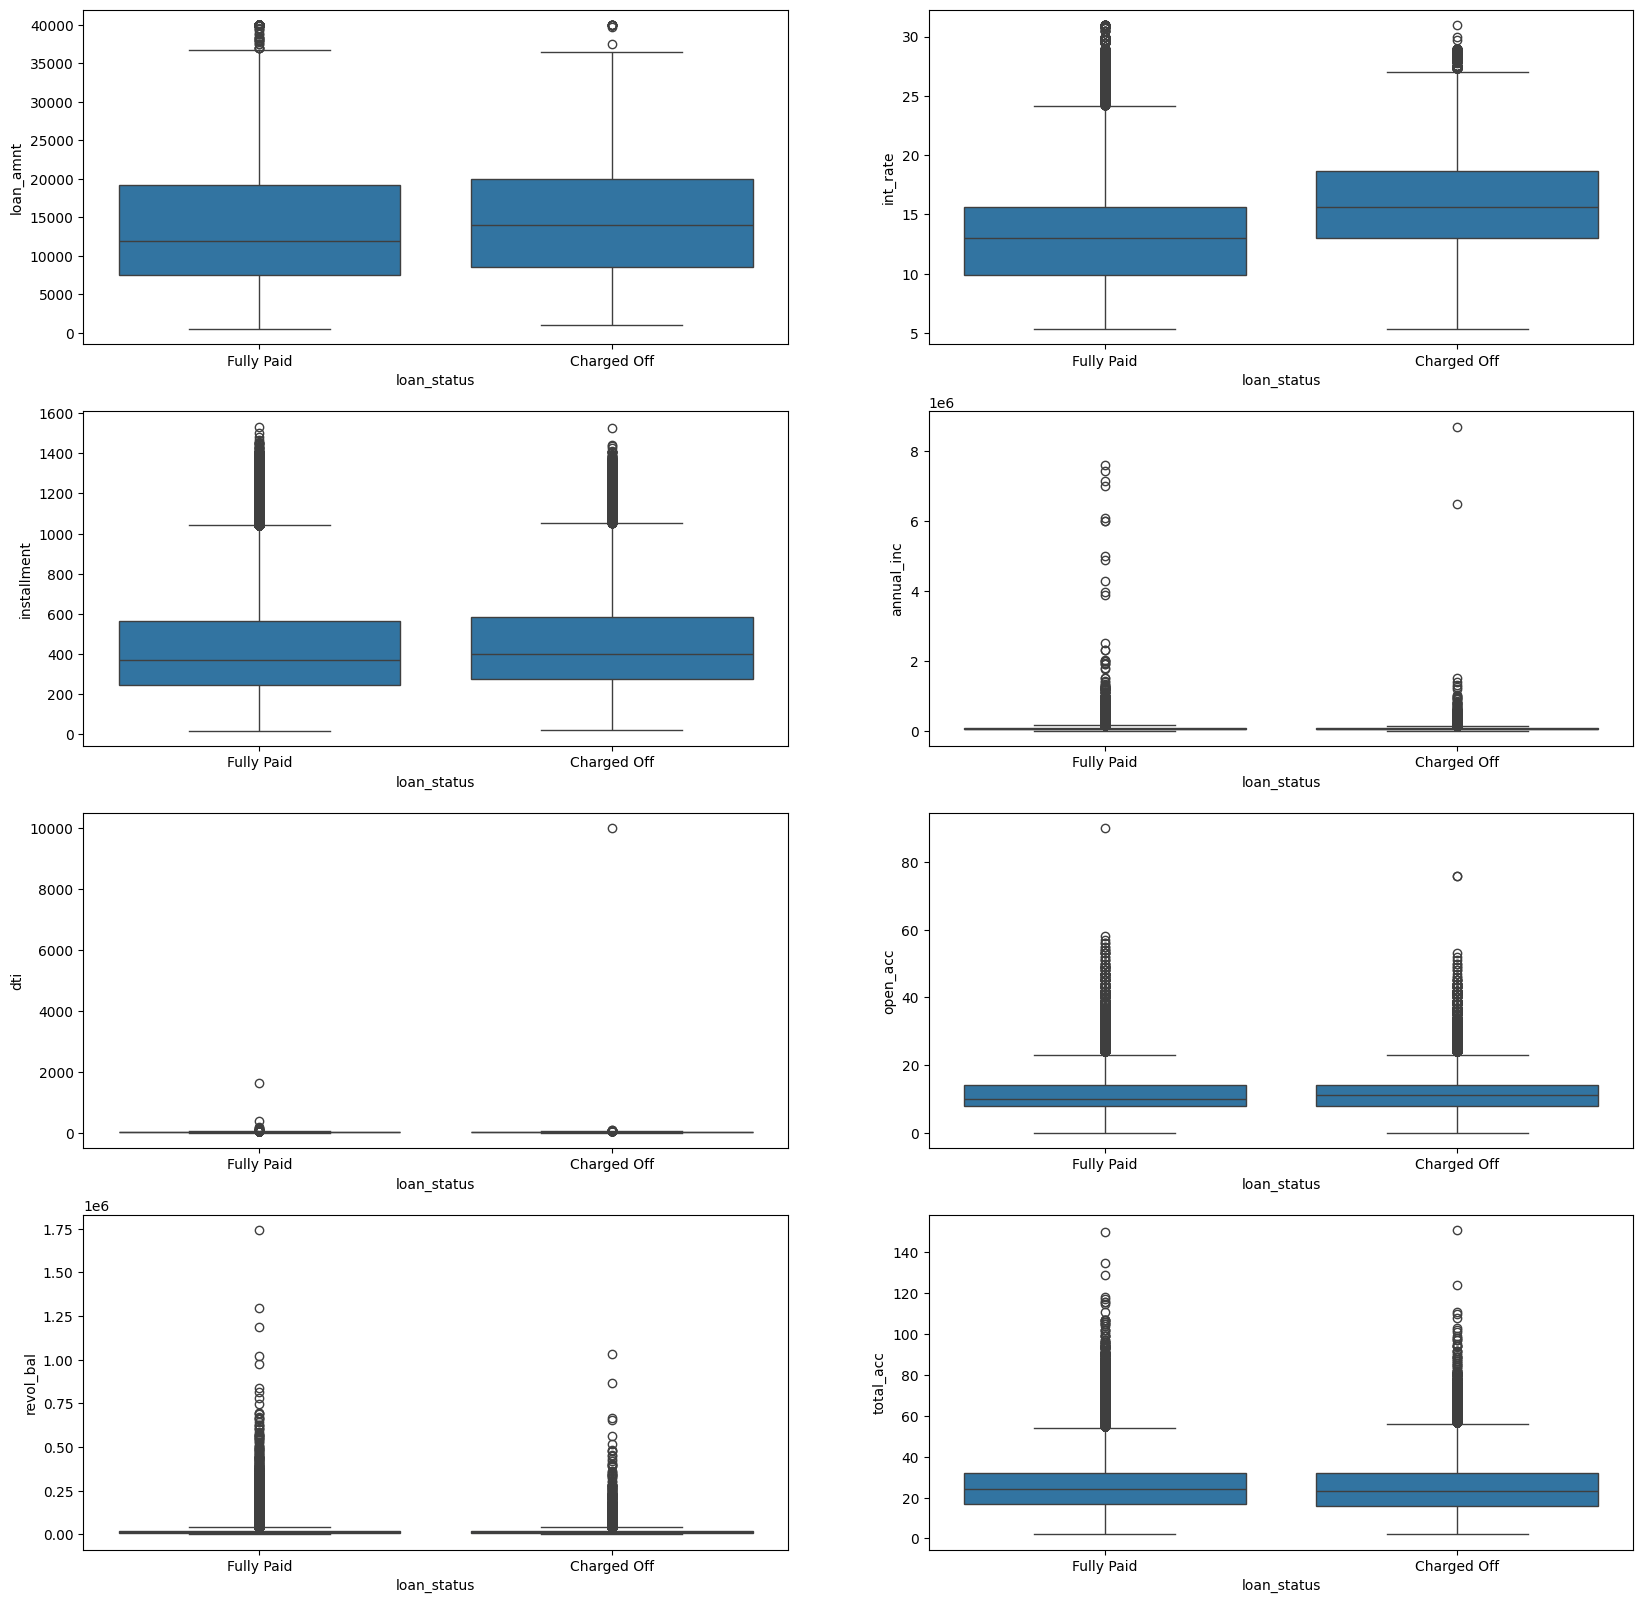

In [14]:
variables = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'total_acc']
fig, axs = plt.subplots(4, 2, figsize = (20, 20))
for i, ax in zip(variables, axs.ravel()):
  sns.boxplot(data = loantap, y = i, x = 'loan_status', ax = ax)

* **Observations:**

1. `loan_amnt`, `int_rate` and `installment` have significantly lesser outliers.
2. `open_acc` and `total_acc` have a moderately high outliers.
3. `annual_inc`, `dti` and `revol_bal` have **very very strong** outliers as all these fields have very high value at the end. We will be able to visualize it if we calculate the higher order percentile values (starting from 90 to 99.9).

* Detailed Analysis of **Categorical Variables** and **Text Fields**:

1. `term`

In [15]:
loantap['term'].value_counts()

 36 months    302005
 60 months     94025
Name: term, dtype: int64

In [16]:
loantap['term'] = loantap['term'].apply(lambda x: x.strip(" "))

<Axes: xlabel='term', ylabel='count'>

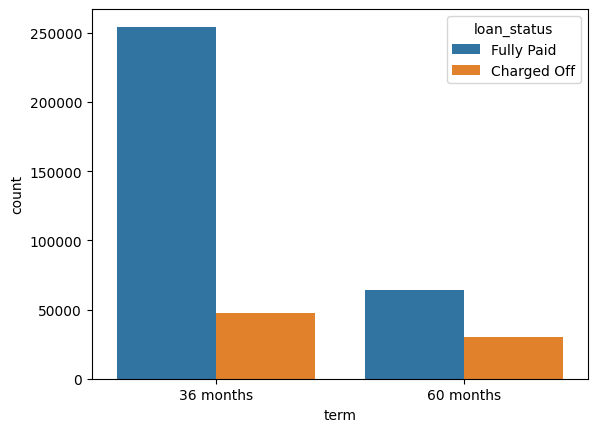

In [17]:
sns.countplot(data = loantap, x = 'term', hue = 'loan_status')

* 36  months is dominant over 60 months for `term`.

* In order to provide the `term` in the Logistic Regression model, we have to delete the text, if there is any. The word **months** makes no sense for preparing the dataset, hence we can remove the string **months** from all the entries.

In [18]:
loantap['term'] = loantap['term'].apply(lambda x: x.split(" ")[0])

2. `grade`

In [19]:
loantap['grade'].value_counts()

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

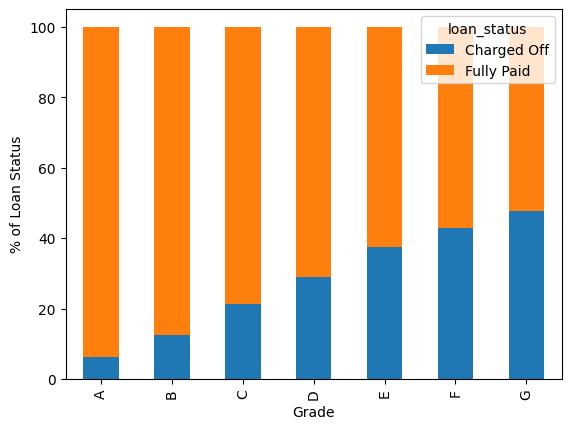

In [112]:
import matplotlib.pyplot as plt
grade_status = loantap.groupby('grade')['loan_status'].value_counts()
grade_status_percentage = (grade_status / grade_status.groupby(level=0).sum()) * 100
grade_status_percentage.unstack().plot(kind='bar', stacked=True)
plt.xlabel('Grade')
plt.ylabel('% of Loan Status')
plt.show()


<Axes: xlabel='grade', ylabel='count'>

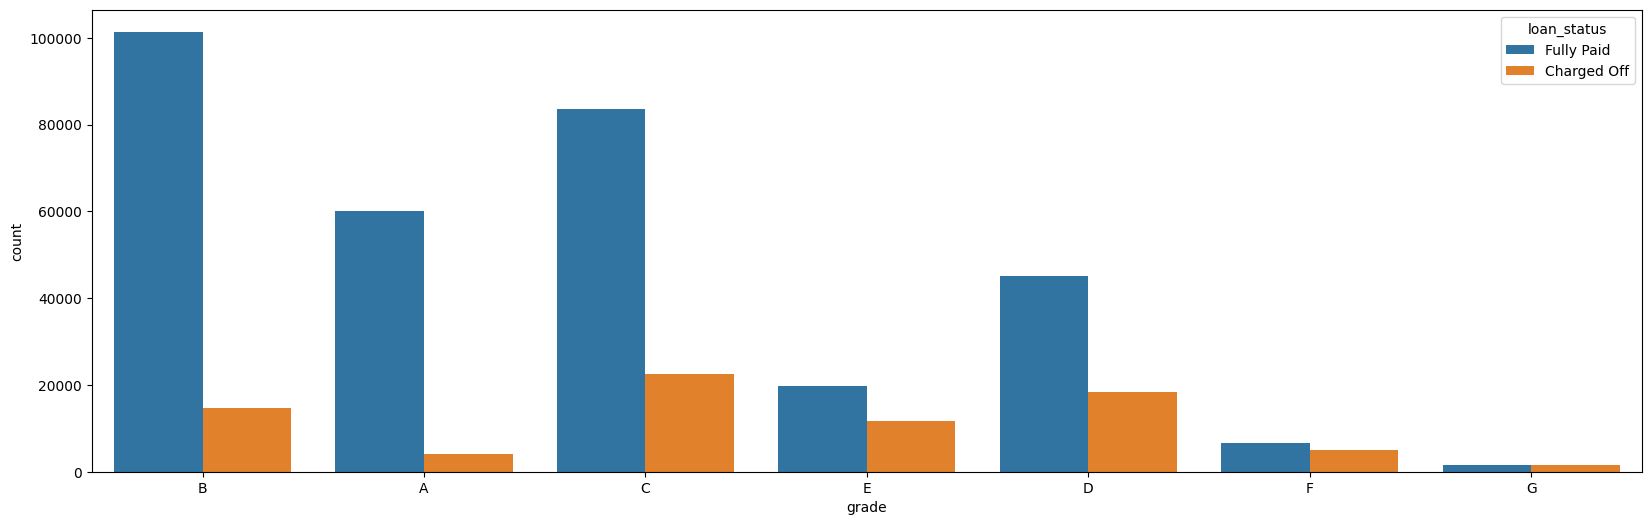

In [109]:
plt.figure(figsize = (20, 6))
sns.countplot(data = loantap, x = 'grade', hue = 'loan_status')

* Grade B has the highest count amongst all the borrowers.

3. `sub_grade`

<Axes: xlabel='sub_grade', ylabel='count'>

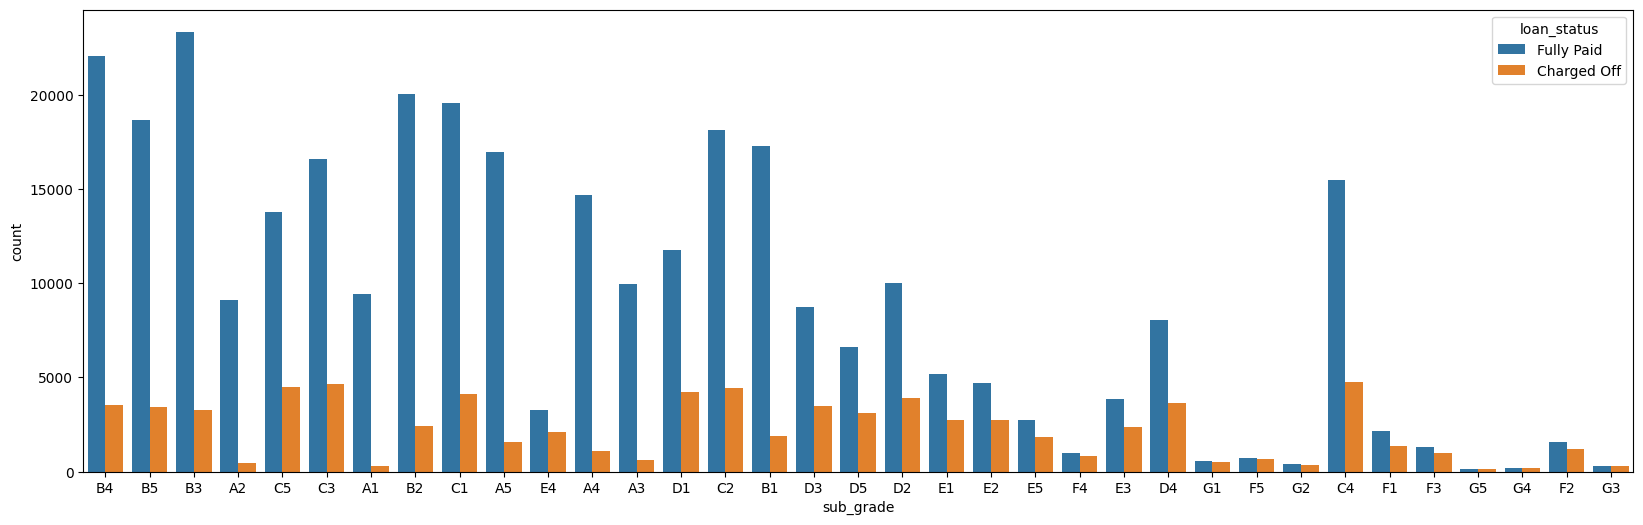

In [21]:
plt.figure(figsize = (20, 6))
sns.countplot(data = loantap, x = 'sub_grade', hue = 'loan_status')

4. `emp_title`

In [22]:
loantap['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

* The very common profession of the borrowers are **teacher** and **manager**.

* There are 1,73,105 type of Titles with a lot of duplicate entries with different case of wordings (e.g.: Teacher, teacher etc.). Hence to avoid the complexity of the model, we are going to drop this feature.

5. `emp_length`

In [23]:
loantap['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

<Axes: xlabel='emp_length', ylabel='count'>

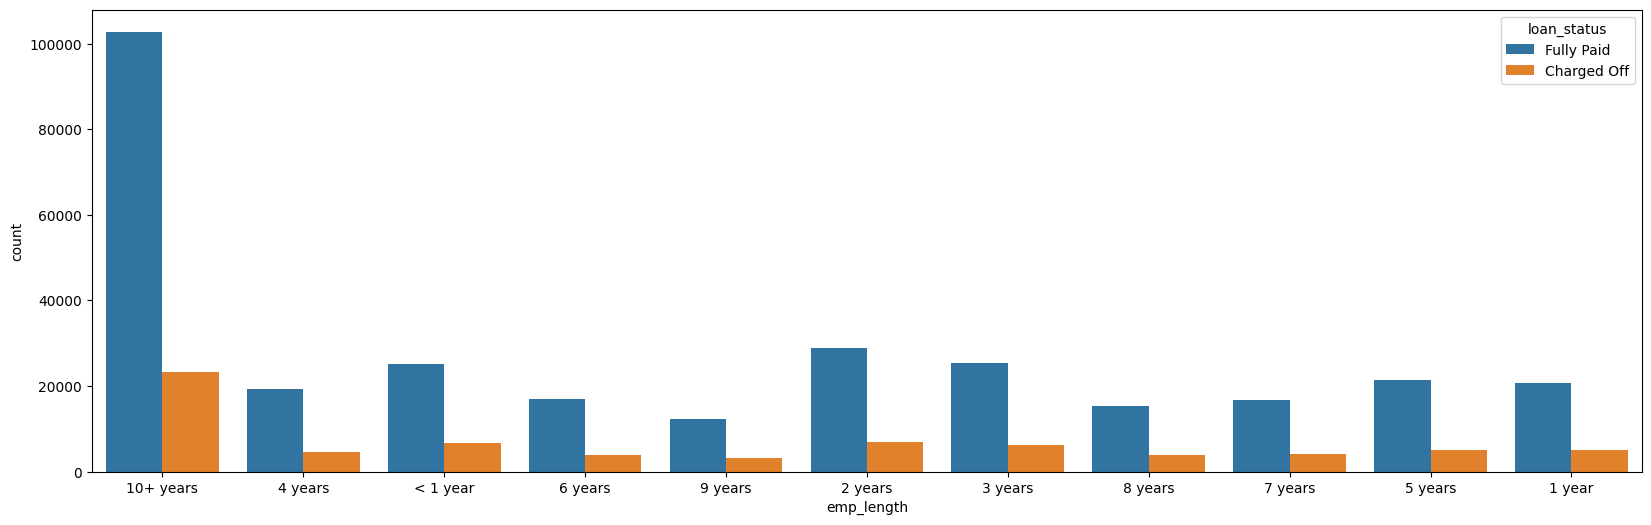

In [24]:
plt.figure(figsize = (20, 6))
sns.countplot(data = loantap, x = 'emp_length', hue = 'loan_status')

* Most of the people are working for more than 10 years.

6. `home_ownership`

In [25]:
loantap['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

As there are lesser count with None, Any and Other, we can concatinate all these types and make a single category named 'Other`.

In [26]:
loantap['home_ownership'] = loantap['home_ownership'].replace({'NONE': 'OTHER', 'ANY': 'OTHER'})

In [27]:
loantap['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

<Axes: xlabel='home_ownership', ylabel='count'>

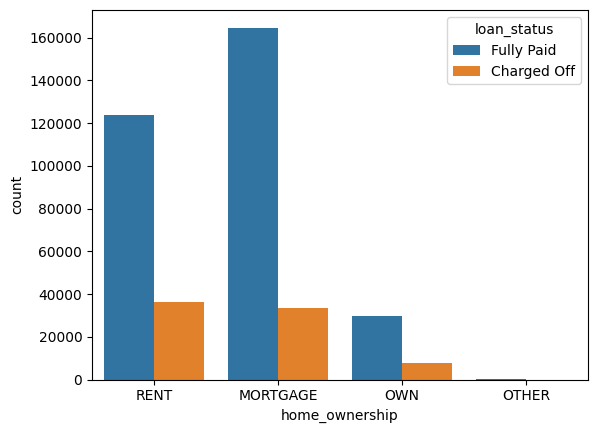

In [28]:
sns.countplot(data = loantap, x = 'home_ownership', hue = 'loan_status')

* **Mortgage** has the highest count as the `home_ownership`.

7. `verification_status`

In [29]:
loantap['verification_status'].value_counts()

Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64

<Axes: xlabel='verification_status', ylabel='count'>

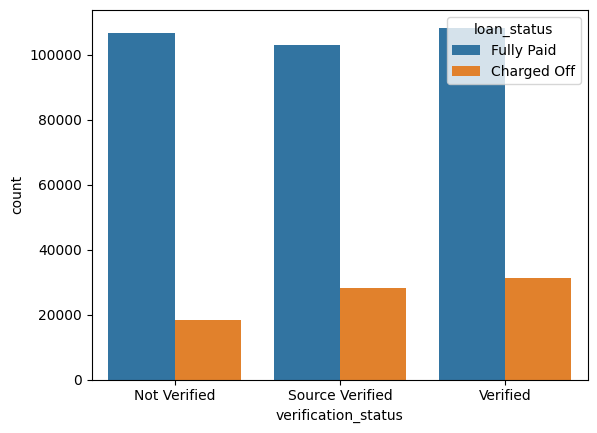

In [30]:
sns.countplot(data = loantap, x = 'verification_status', hue = 'loan_status')

* **Verified** is the predominant status of verification of the loans.

8. `purpose`

In [31]:
loantap['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

* The most important purpose to take loan is **debt consolidation**.

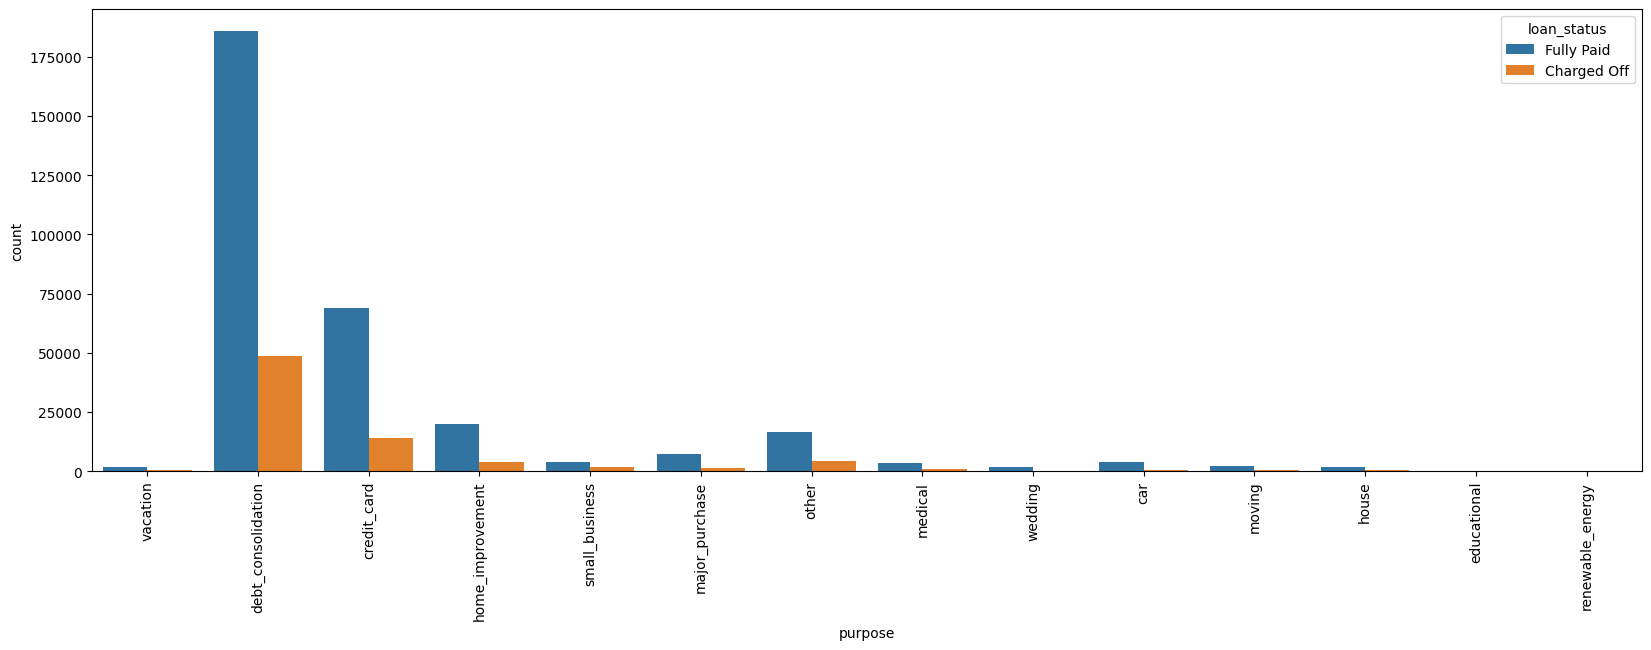

In [32]:
fig, ax = plt.subplots(1, 1, figsize = (20, 6))
sns.countplot(data = loantap, x = 'purpose', hue = 'loan_status')
ax.tick_params(axis='x', rotation=90)

9. `title`

In [33]:
loantap['title'].value_counts()

Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: title, Length: 48817, dtype: int64

In [34]:
# (loantap['title'] == 'Consolidating at a lower rate to save $$').sum()

There are similarities between the categories of `purpose` and entries of `title` field. In order to avoid encoding complexities and curse of dimensionality, we will drop this `title` field.

10. `initial_list_status`

In [35]:
loantap['initial_list_status'].value_counts()

f    238066
w    157964
Name: initial_list_status, dtype: int64

<Axes: xlabel='initial_list_status', ylabel='count'>

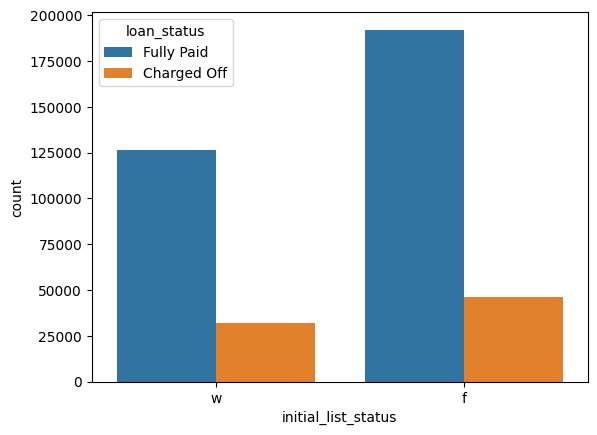

In [36]:
sns.countplot(data = loantap, x = 'initial_list_status', hue = 'loan_status')

* Initial List Status is **F** for majority case.

11. `application_type`

In [37]:
loantap['application_type'].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

<Axes: xlabel='application_type', ylabel='count'>

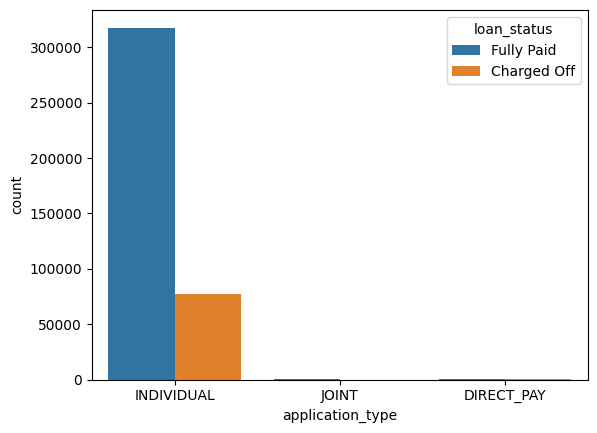

In [38]:
sns.countplot(data = loantap, x = 'application_type', hue = 'loan_status')

* Mostly all the applicants are **Individuals**.

12. `address`

In [39]:
loantap['address'].value_counts()

USCGC Smith\r\nFPO AE 70466                           8
USS Johnson\r\nFPO AE 48052                           8
USNS Johnson\r\nFPO AE 05113                          8
USS Smith\r\nFPO AP 70466                             8
USNS Johnson\r\nFPO AP 48052                          7
                                                     ..
455 Tricia Cove\r\nAustinbury, FL 00813               1
7776 Flores Fall\r\nFernandezshire, UT 05113          1
6577 Mia Harbors Apt. 171\r\nRobertshire, OK 22690    1
8141 Cox Greens Suite 186\r\nMadisonstad, VT 05113    1
787 Michelle Causeway\r\nBriannaton, AR 48052         1
Name: address, Length: 393700, dtype: int64

The useful information from the `address` field can be the ZIP code of the borrowers. Hence we are extracting the same and make a new feature.

In [40]:
loantap['zip_code'] = loantap['address'].apply(lambda text: text.split(" ")[-1])

In [41]:
loantap['zip_code'].value_counts()

70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: zip_code, dtype: int64

<Axes: xlabel='zip_code', ylabel='count'>

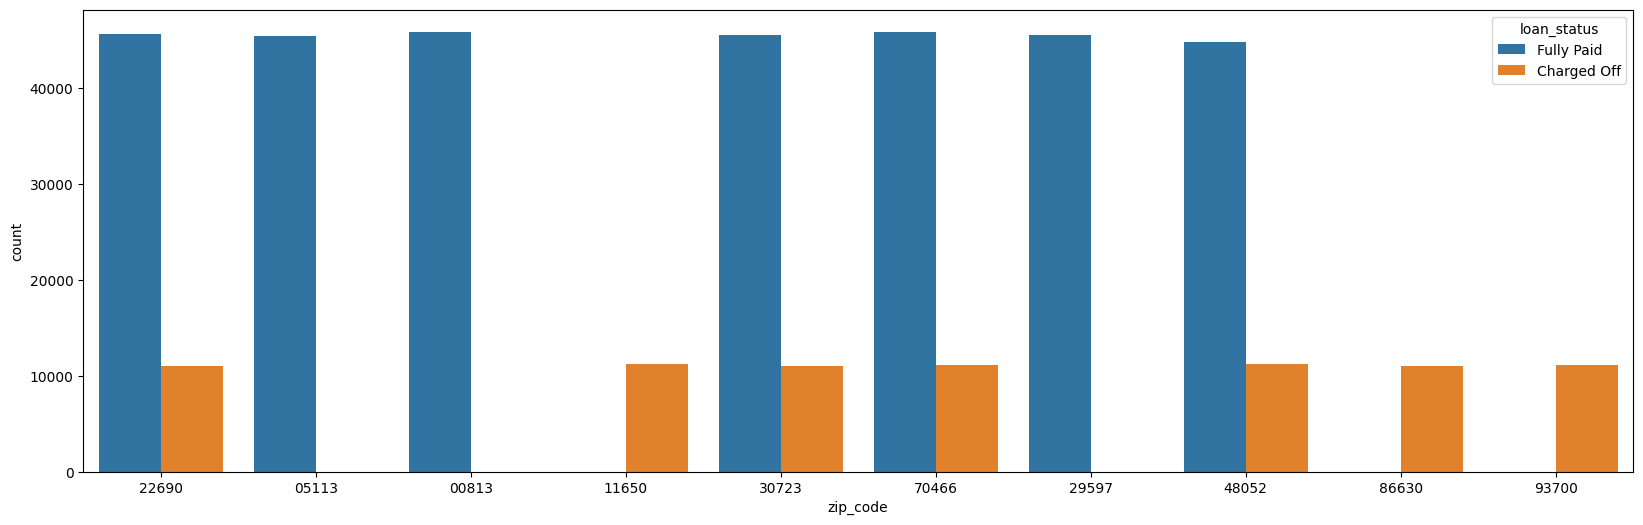

In [42]:
plt.figure(figsize = (20, 6))
sns.countplot(data = loantap, x = 'zip_code', hue = 'loan_status')

* **Datetime** fields:

There are two datetime objects, `issue_d` and `earliest_cr_line`. In order to simplify the model, we have taken difference between these two dates and took the day count in **years**.

In [43]:
loantap['loan_tenure'] = (pd.to_datetime(loantap['issue_d']) - pd.to_datetime(loantap['earliest_cr_line'])) / np.timedelta64(1, 'Y')

* **Histogram Plots** for **Numerical Variables**:

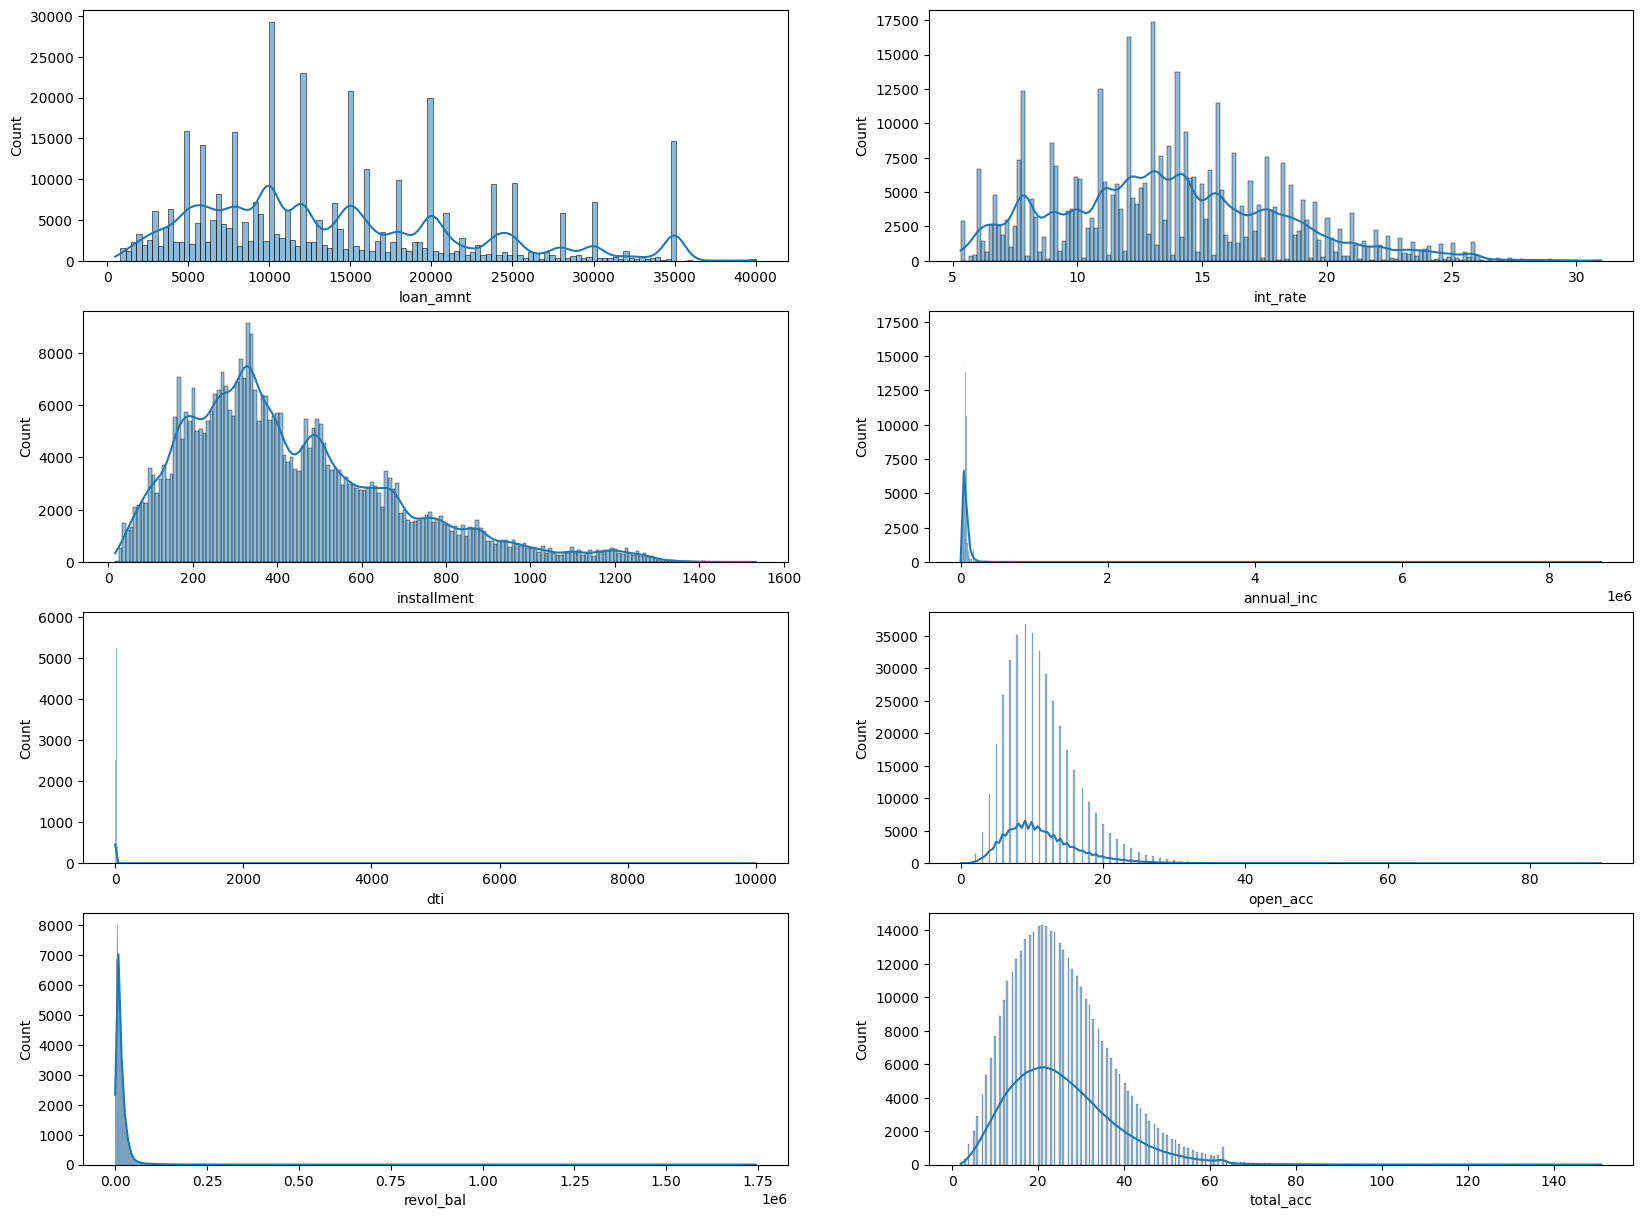

In [44]:
numerical_variables = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'total_acc']
fig, axs = plt.subplots(4, 2, figsize = (20, 15))
for i, ax in zip(numerical_variables, axs.ravel()):
  sns.histplot(loantap[i], kde = True, ax = ax)

* The distribution of the numerical features are approximately gaussian.

* **Target Variable** - `loan_status`:

In [45]:
loantap['loan_status'].value_counts(normalize = True)

Fully Paid     0.803871
Charged Off    0.196129
Name: loan_status, dtype: float64

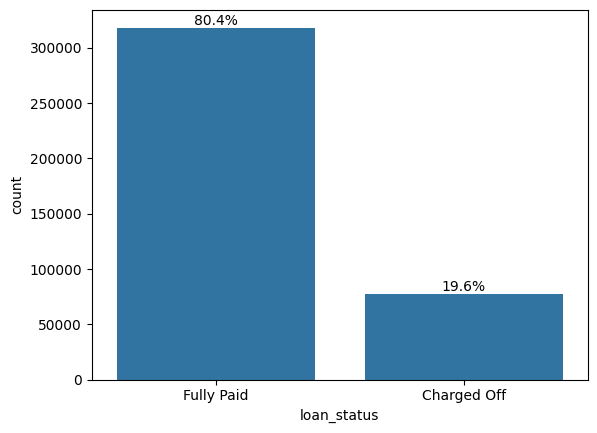

In [46]:
ax = sns.countplot(data=loantap, x='loan_status')
total = len(loantap['loan_status'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()


* **Feature Engineering:**

1. Implementation of **Flags** on `pub_rec`, `mort_acc` and `pub_rec_bankruptcies`:

If the value is greater than 1.0 then 1 ; else 0.

In [47]:
loantap['pub_rec'] = loantap['pub_rec'].apply(lambda x: 1 if x > 1.0 else 0)
loantap['mort_acc'] = loantap['mort_acc'].apply(lambda x: 1 if x > 1.0 else 0)
loantap['pub_rec_bankruptcies'] = loantap['pub_rec_bankruptcies'].apply(lambda x: 1 if x > 1.0 else 0)

* **Missing Value Imputation** using **Most Frequent** value of the particular features:

In [48]:
from sklearn.impute import SimpleImputer, KNNImputer
imputer = SimpleImputer(strategy = "most_frequent")
#imputer = KNNImputer(n_neighbors = 5)

missing_data_columns = ['emp_length', 'revol_util']

for i in missing_data_columns:
  loantap[i] = imputer.fit_transform(loantap[i].values.reshape(-1, 1))

In [49]:
missing_data(loantap)

,Total Count,Percentage
emp_title,22927,5.79
title,1755,0.44


* Note: As we are going to drop `emp_title` and `title` fields before preparing the clean dataset, we did not perform **missing value treatment** on those attributes.

* Converting `emp_length`: a Categorical Variable to a Numeric Variable for easier implementation:

Here we are considering the value **0**, if it is **< 1 year** and **10** if it is **10+ years**.

In [50]:
loantap['emp_length'] = loantap['emp_length'].apply(lambda year: year.split(" ")[0]).replace({'<': 0, '10+': 10})

* **Outlier Treatment**:

As we do not have any sufficient business knowledge about the importance of the data, we will not delete any entry in order to remove Outlier, instead we will recode Outliers using a technique, called **Winsorization**.

Winsorization is the process of replacing the extreme values of statistical data in order to limit the effect of the outliers on the calculations or the results obtained by using that data. The mean value calculated after such replacement of the extreme values is called winsorized mean.

For example, 90% winsorization means the replacement of the top 5% and bottom 5% of the data. The top 5% of the data is replaced by the value of the data at the 95th percentile and the value of the bottom 5% of the data is replaced by the value of the data at the 5th percentile.

Hence, unlike following traditional approach of Outlier Removal using **Inter-Quartile Range**, we will use **Winsorization**.

Let us calculate the different higher percentile values for the Numerical variables.

In [51]:
quantiles = []
for i in variables:
  quantiles.append([i, loantap[i].quantile(0.90), loantap[i].quantile(0.925), loantap[i].quantile(0.95), loantap[i].quantile(0.975), loantap[i].quantile(0.99), loantap[i].quantile(0.999)])
percentile_table = pd.DataFrame(quantiles, columns = ['Feature', '90% Quantile', '92.5% Quantile', '95% Quantile', '97.5% Quantile', '99% Quantile', '99.9% Quantile'])

In [52]:
percentile_table

,Feature,90% Quantile,92.5% Quantile,95% Quantile,97.5% Quantile,99% Quantile,99.9% Quantile
0,loan_amnt,26000.00,28500.00,30975.00,35000.00,35000.000,35000.000
1,int_rate,19.52,20.49,21.97,23.63,25.280,27.990
2,installment,785.48,847.59,925.60,1075.17,1202.373,1309.660
3,annual_inc,120000.00,133000.00,150000.00,185000.00,250000.000,515000.000
4,dti,28.50,29.80,31.58,33.84,36.430,39.860
5,open_acc,18.00,19.00,21.00,24.00,27.000,38.000
6,revol_bal,31470.00,35331.00,41066.55,54201.00,86039.620,250130.765
7,total_acc,41.00,44.00,47.00,53.00,60.000,77.000


Let us define a method to winsorize and replace the top values, checking the boxplot of those variables (where the outliers are visible).

In [53]:
def outlier_winsorization(df, column, limit):
  threshold = df[column].quantile(limit)
  df[column] = df[column].apply(lambda x: threshold if x >= threshold else x)

We are using different thresholds by observing the outliers in their respective boxplots.

In [54]:
outlier_winsorization(loantap, 'loan_amnt', 0.975)
outlier_winsorization(loantap, 'int_rate', 0.99)
outlier_winsorization(loantap, 'installment', 0.975)
outlier_winsorization(loantap, 'annual_inc', 0.95)
outlier_winsorization(loantap, 'dti', 0.99)
outlier_winsorization(loantap, 'open_acc', 0.95)
outlier_winsorization(loantap, 'revol_bal', 0.925)
outlier_winsorization(loantap, 'total_acc', 0.99)

In [55]:
# from scipy.stats.mstats import winsorize
# loantap['loan_amnt'] = winsorize(loantap['loan_amnt'], limits = (0, 0.05))

* **Boxplots** of those numerical features after **Outlier Imputation**:

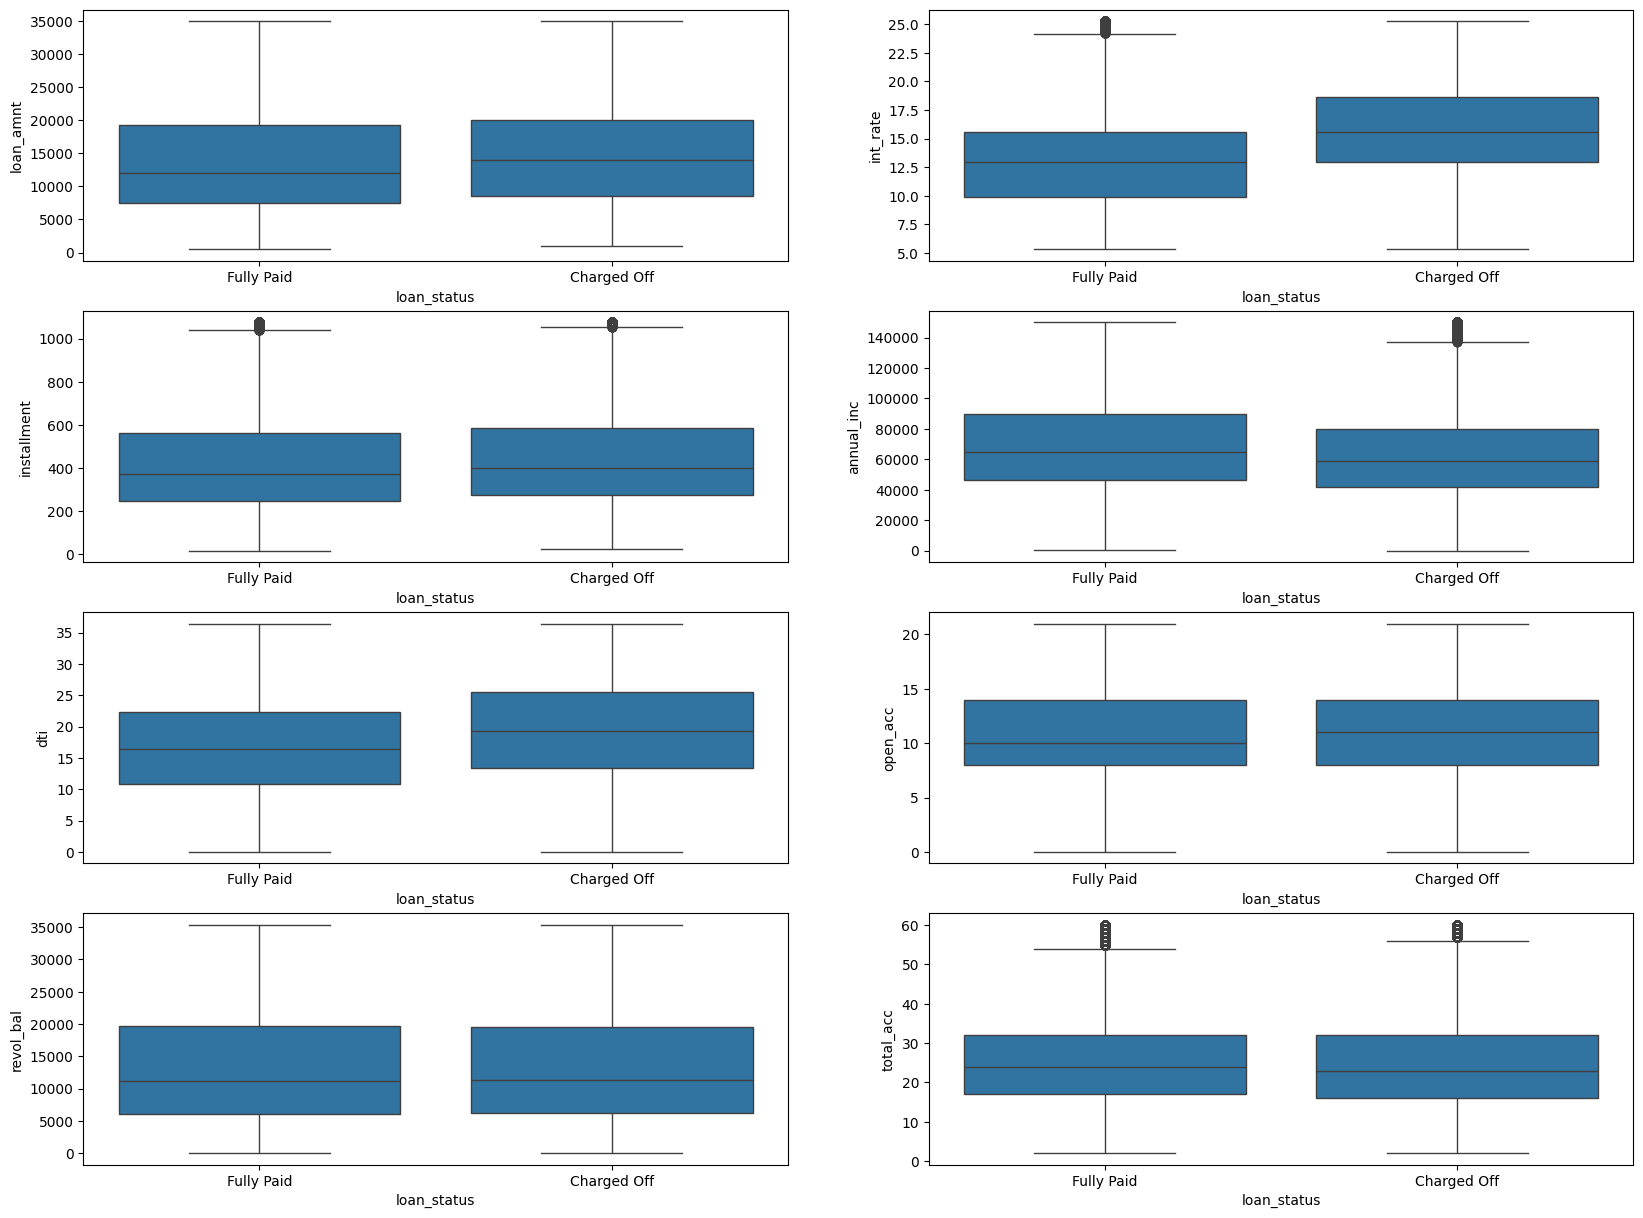

In [56]:
variables = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'total_acc']
fig, axs = plt.subplots(4, 2, figsize = (20, 15))
for i, ax in zip(variables, axs.ravel()):
  sns.boxplot(data = loantap, y = i, x = 'loan_status', ax = ax)

<Axes: xlabel='loan_amnt', ylabel='installment'>

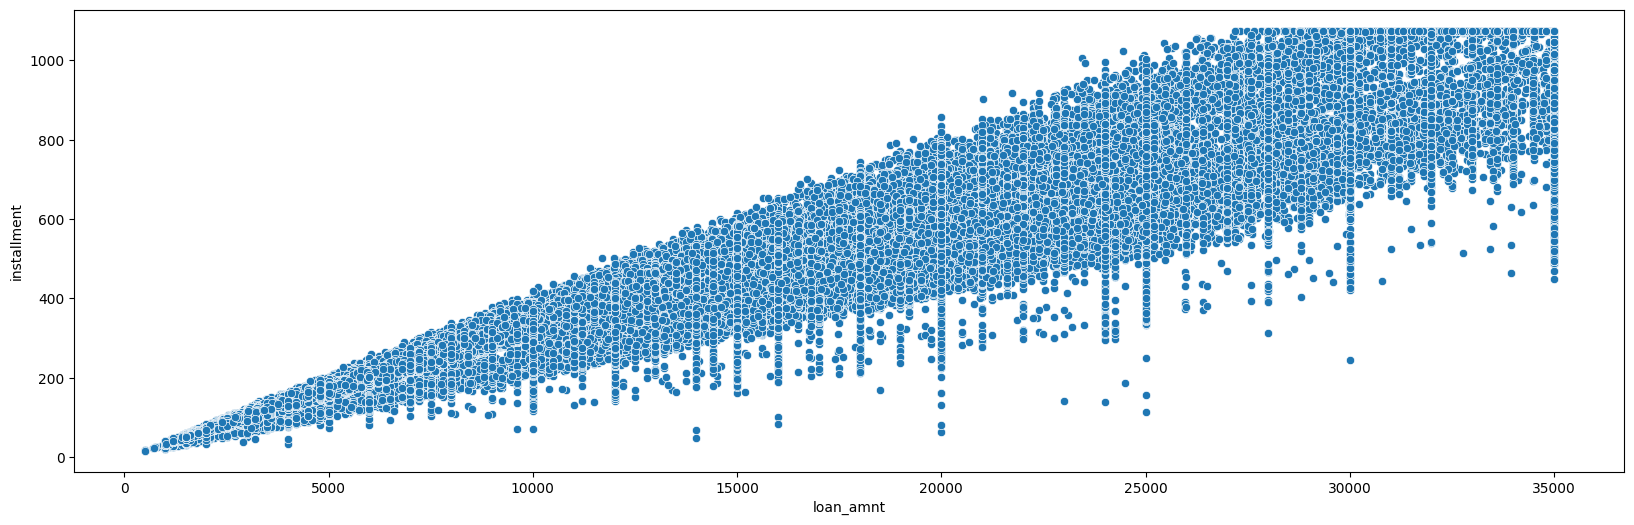

In [57]:
plt.figure(figsize = (20, 6))
sns.scatterplot(data = loantap, x = 'loan_amnt', y = 'installment')

<Axes: xlabel='revol_bal', ylabel='revol_util'>

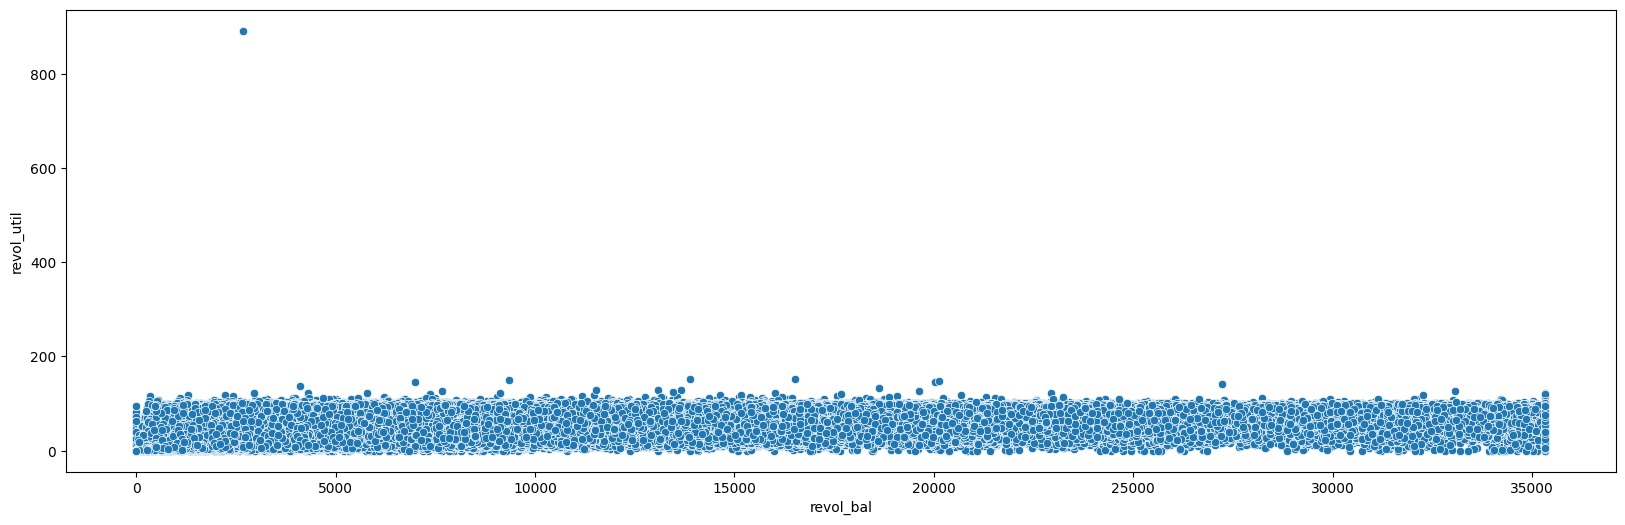

In [58]:
plt.figure(figsize = (20, 6))
sns.scatterplot(data = loantap, x = 'revol_bal', y = 'revol_util')

* **Encooding** Categorical Variables using **Dummy Encoding** (Special Type of **One-Hot Encoding**):

In [59]:
one_hot_loantap = pd.get_dummies(loantap, columns = ['grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type'],
                                 prefix = {'grade': 'grade',
                                                    'home_ownership': 'home_ownership',
                                                    'verification_status': 'verification_status',
                                                    'purpose': 'purpose',
                                                    'initial_list_status': 'initial_list_status',
                                                    'application_type': 'application_type'},
                                drop_first = True)

* Preparing the Final Dataset:

In [60]:
#loantap_clean = one_hot_loantap.drop(columns = ['sub_grade', 'emp_title', 'emp_length', 'issue_d', 'title', 'earliest_cr_line', 'revol_bal', 'pub_rec_bankruptcies', 'address', 'zip_code'], axis = 1)
loantap_clean = one_hot_loantap.drop(columns = ['sub_grade', 'emp_title', 'issue_d', 'title', 'earliest_cr_line', 'address'], axis = 1)
loantap_clean['loan_status'].replace({'Fully Paid': 0, 'Charged Off': 1}, inplace = True)

Let us check the correlation amongst all the features we are going to use in the Logistic Regression model.

<Axes: >

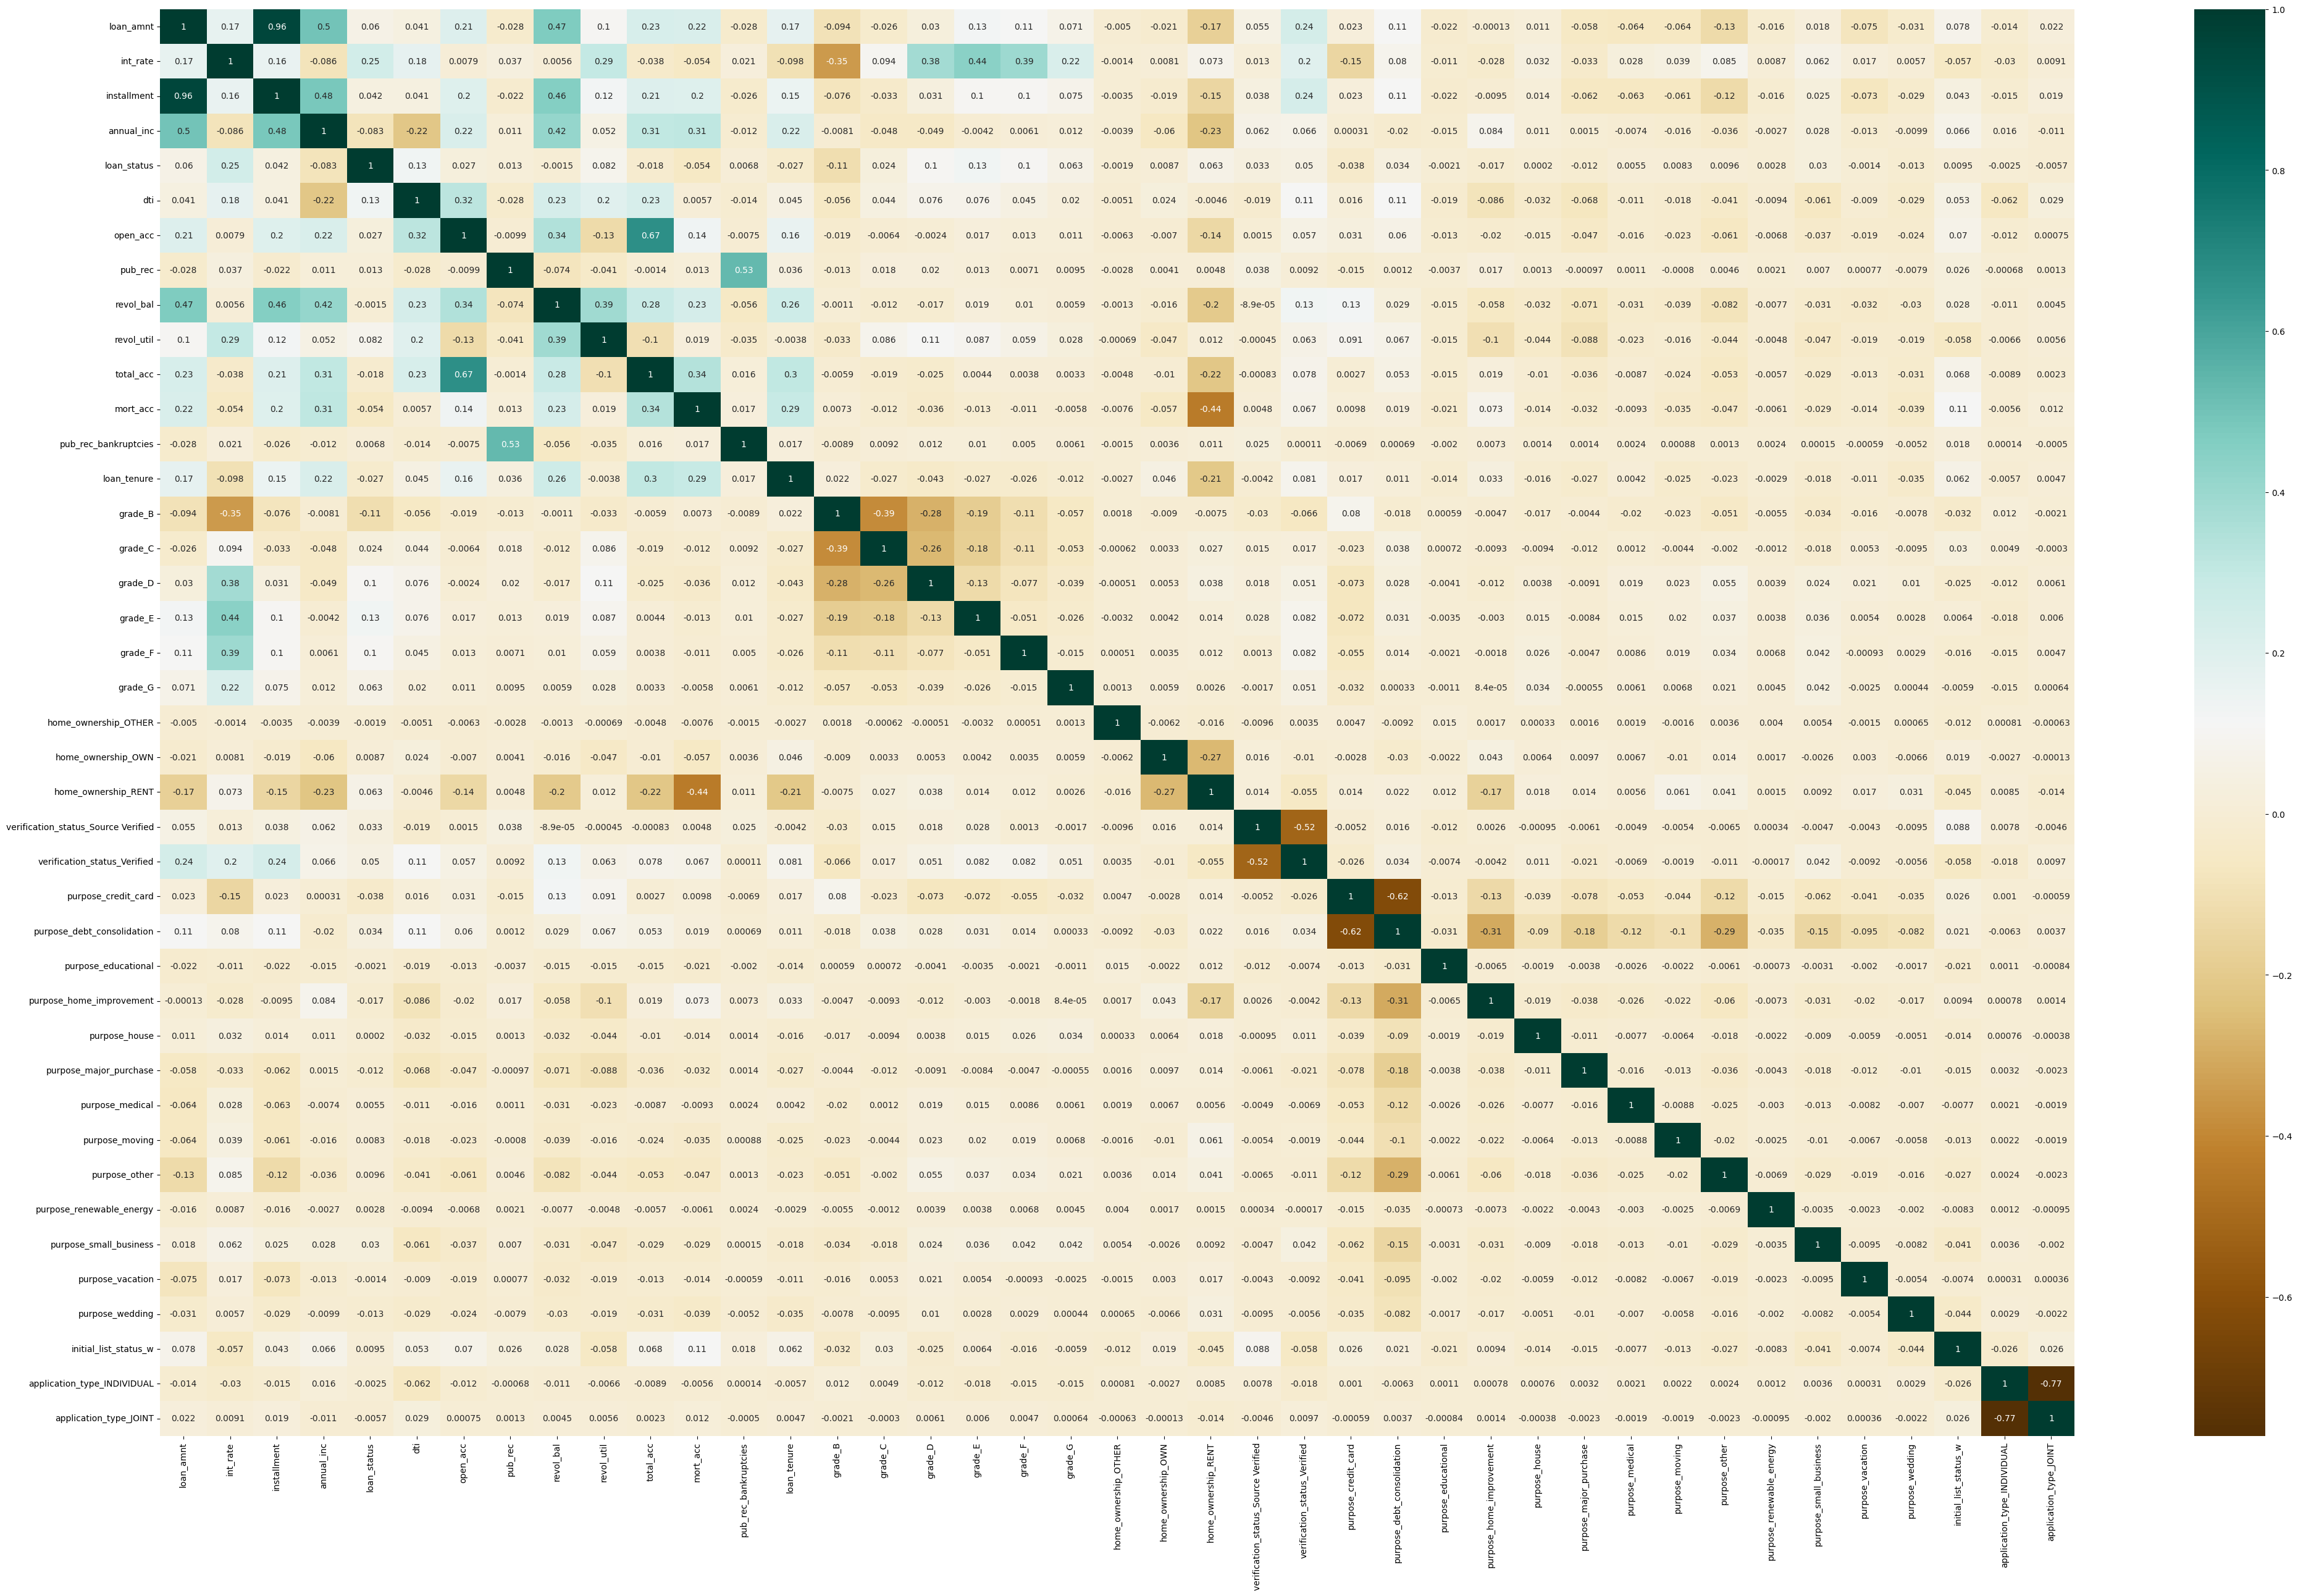

In [61]:
plt.figure(figsize = (50, 30))
sns.heatmap(data = loantap_clean.corr(), annot = True, cmap = 'BrBG')

* **Logistic Regression:**

* Logistic Function:

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

* **Log-Loss Function** of Logistic Regression:

$$ - \frac{1}{N}\sum_{i = 1}^{n}y_i \cdot \log(p(y_i)) + (1 - y_i) \cdot \log(1 - p(y_i))$$

In [62]:
X = loantap_clean.drop(columns = ['loan_status'], axis = 1)
y = loantap_clean['loan_status']

In [63]:
X.shape

(396030, 43)

Finally, there are **43 features** after dropping few irrelevant features and one-hot encoding of categorical variables.

* Split the Dataset into 80% Training Data and 20% Test Data:

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 44)

We are using StandardScaler, which rescales the data to have a mean of 0 and a standard deviation of 1. This results in a distribution with zero mean and unit variance and may achieve normality which may improve model performance.

However, we have tried with MinMaxScaler and found same performance metrics. Hence we preferred StandardScaler over MinMaxScaler.

In [65]:
sc = StandardScaler()
sc.fit(X_train)
X_train = pd.DataFrame(sc.fit_transform(X_train), columns = X_train.columns, index = y_train.index)
X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns, index = y_test.index)

In [66]:
log_reg = LogisticRegression(C = 1.0)
log_reg.fit(X_train, y_train)

LogisticRegression()

In [67]:
y_train_pred = log_reg.predict(X_train)
y_pred = log_reg.predict(X_test)

* **Performance Metrics:**

Let us define the following:

1. **True Positive (TP):** If the actual value is **positive** and is also classified (predicted) as **positive**.
2. **True Negative (TN):** If the actual value is **negative** and is also classified (predicted) as **negative**.
1. **False Positive (FP):** If the actual value is **nrgative**, but wrongly classified (predicted) as **positive**.
1. **False Negative (FN):** If the actual value is **positive**, but wrongly classified (predicted) as **negative**.

Then,

$ \text{1. Accuracy} = \frac{TN + TP}{TN + FP + TP + FN} $<br><br>
$ \text{2. Precision} = \frac{TP}{TP + FP} $<br><br>
$ \text{3. Recall} = \frac{TP}{TP + FN} $<br><br>
$ \text{2. F1-Score} = 2 \times \frac{Precision \times Recall}{Precision + Recall} $


In [68]:
accuracy = log_reg.score(X_train, y_train)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1_score_val = f1_score(y_train, y_train_pred)

training_data_metrics = pd.DataFrame(index = ['Accuracy','Precision', 'Recall', 'F1-Score'], data = [accuracy, precision, recall, f1_score_val], columns = ['Values']).reset_index()
training_data_metrics.rename(columns = {'index': 'Training Data Metrics'}, inplace = True)
training_data_metrics

,Training Data Metrics,Values
0,Accuracy,0.838099
1,Precision,0.695901
2,Recall,0.307815
3,F1-Score,0.426831


In [69]:
accuracy = log_reg.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score_val = f1_score(y_test, y_pred)

test_data_metrics = pd.DataFrame(index = ['Accuracy', 'Precision', 'Recall', 'F1-Score'], data = [accuracy, precision, recall, f1_score_val], columns = ['Values']).reset_index()
test_data_metrics.rename(columns = {'index': 'Test Data Metrics'}, inplace = True)
test_data_metrics

,Test Data Metrics,Values
0,Accuracy,0.835568
1,Precision,0.686070
2,Recall,0.306988
3,F1-Score,0.424175


In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90     63580
           1       0.69      0.31      0.42     15626

    accuracy                           0.84     79206
   macro avg       0.77      0.64      0.66     79206
weighted avg       0.82      0.84      0.81     79206



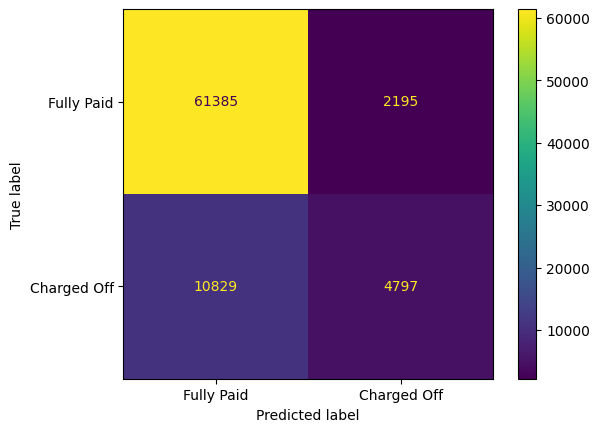

In [71]:
cnf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cnf_matrix, display_labels = ['Fully Paid', 'Charged Off']).plot()

In [72]:
fp = np.round(cnf_matrix[0][1] / y_test.shape[0], 3)
fn = np.round(cnf_matrix[1][0] / y_test.shape[0], 3)
fp_fn = pd.DataFrame(index = ['False Positive', 'False Negative'], data = [fp*100, fn*100], columns = ['Percentage Values']).reset_index().rename(columns = {'index': 'Metric'})
fp_fn

,Metric,Percentage Values
0,False Positive,2.8
1,False Negative,13.7


* **ROC-AUC Curve:**

In [73]:
def roc_curve_plot(y_test, pred_prob):
  logit_roc_auc = roc_auc_score(y_test, pred_prob)
  fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
  plt.figure()
  plt.plot(fpr, tpr, label='Logistic Regression (Area under ROC = %0.2f)' % logit_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc="lower right")
  plt.savefig('ROC_for_Logistic_Regression')
  plt.show()

In [74]:
def precision_recall_plot(y_test, pred_prob):
  precision, recall, thresholds = precision_recall_curve(y_test,  pred_prob)
  plt.figure()
  plt.plot(precision, recall)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('precision')
  plt.ylabel('recall')
  plt.title('precision_recall_curve')
  plt.legend(loc="lower right")
  plt.savefig('precision_recall_curve_for_Logistic_Regression')
  plt.show()

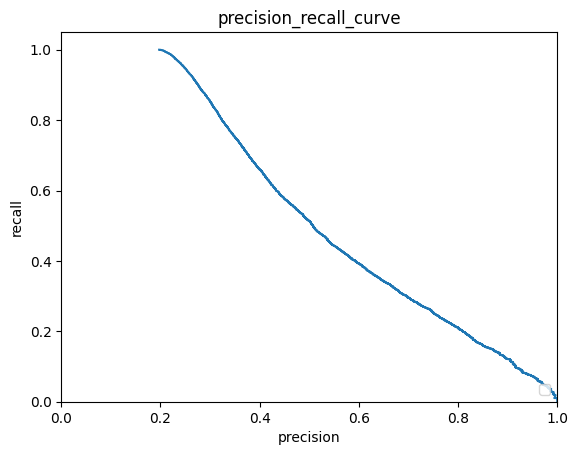

In [75]:
precision_recall_plot(y_test, log_reg.predict_proba(X_test)[:, 1])

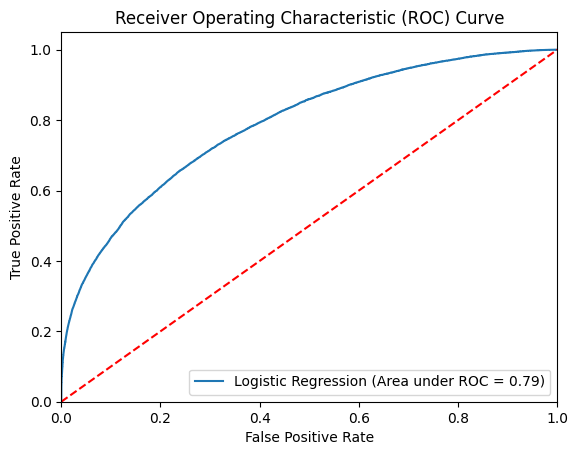

In [76]:
roc_curve_plot(y_test, log_reg.predict_proba(X_test)[:, 1])

* **Observations:**

1. The Area under the ROC Curve is 0.79, i.e. it is performing better than the random classifier (whose AU-ROC = 0.5).
2. It means, if we take two data points from two different classes, there is a 79% chance that the model will correctly segregate or rank order them.

* **Model Coefficients with Column Names:**

In [77]:
feature_coef = pd.DataFrame(data = log_reg.coef_, columns = X.columns, index = ['Values']).T
feature_coef.reset_index(inplace = True)
feature_coef.rename(columns = {'index': 'Feature', 'Values': 'Co-Efficient'}, inplace = True)
feature_coef.sort_values(by = 'Co-Efficient', ascending = False)

,Feature,Co-Efficient
14,zip_code,0.857633
18,grade_D,0.457717
17,grade_C,0.425763
19,grade_E,0.395843
20,grade_F,0.267061
16,grade_B,0.233984
1,term,0.211477
6,dti,0.189395
21,grade_G,0.149288
7,open_acc,0.139336


<Axes: xlabel='Co-Efficient', ylabel='Feature'>

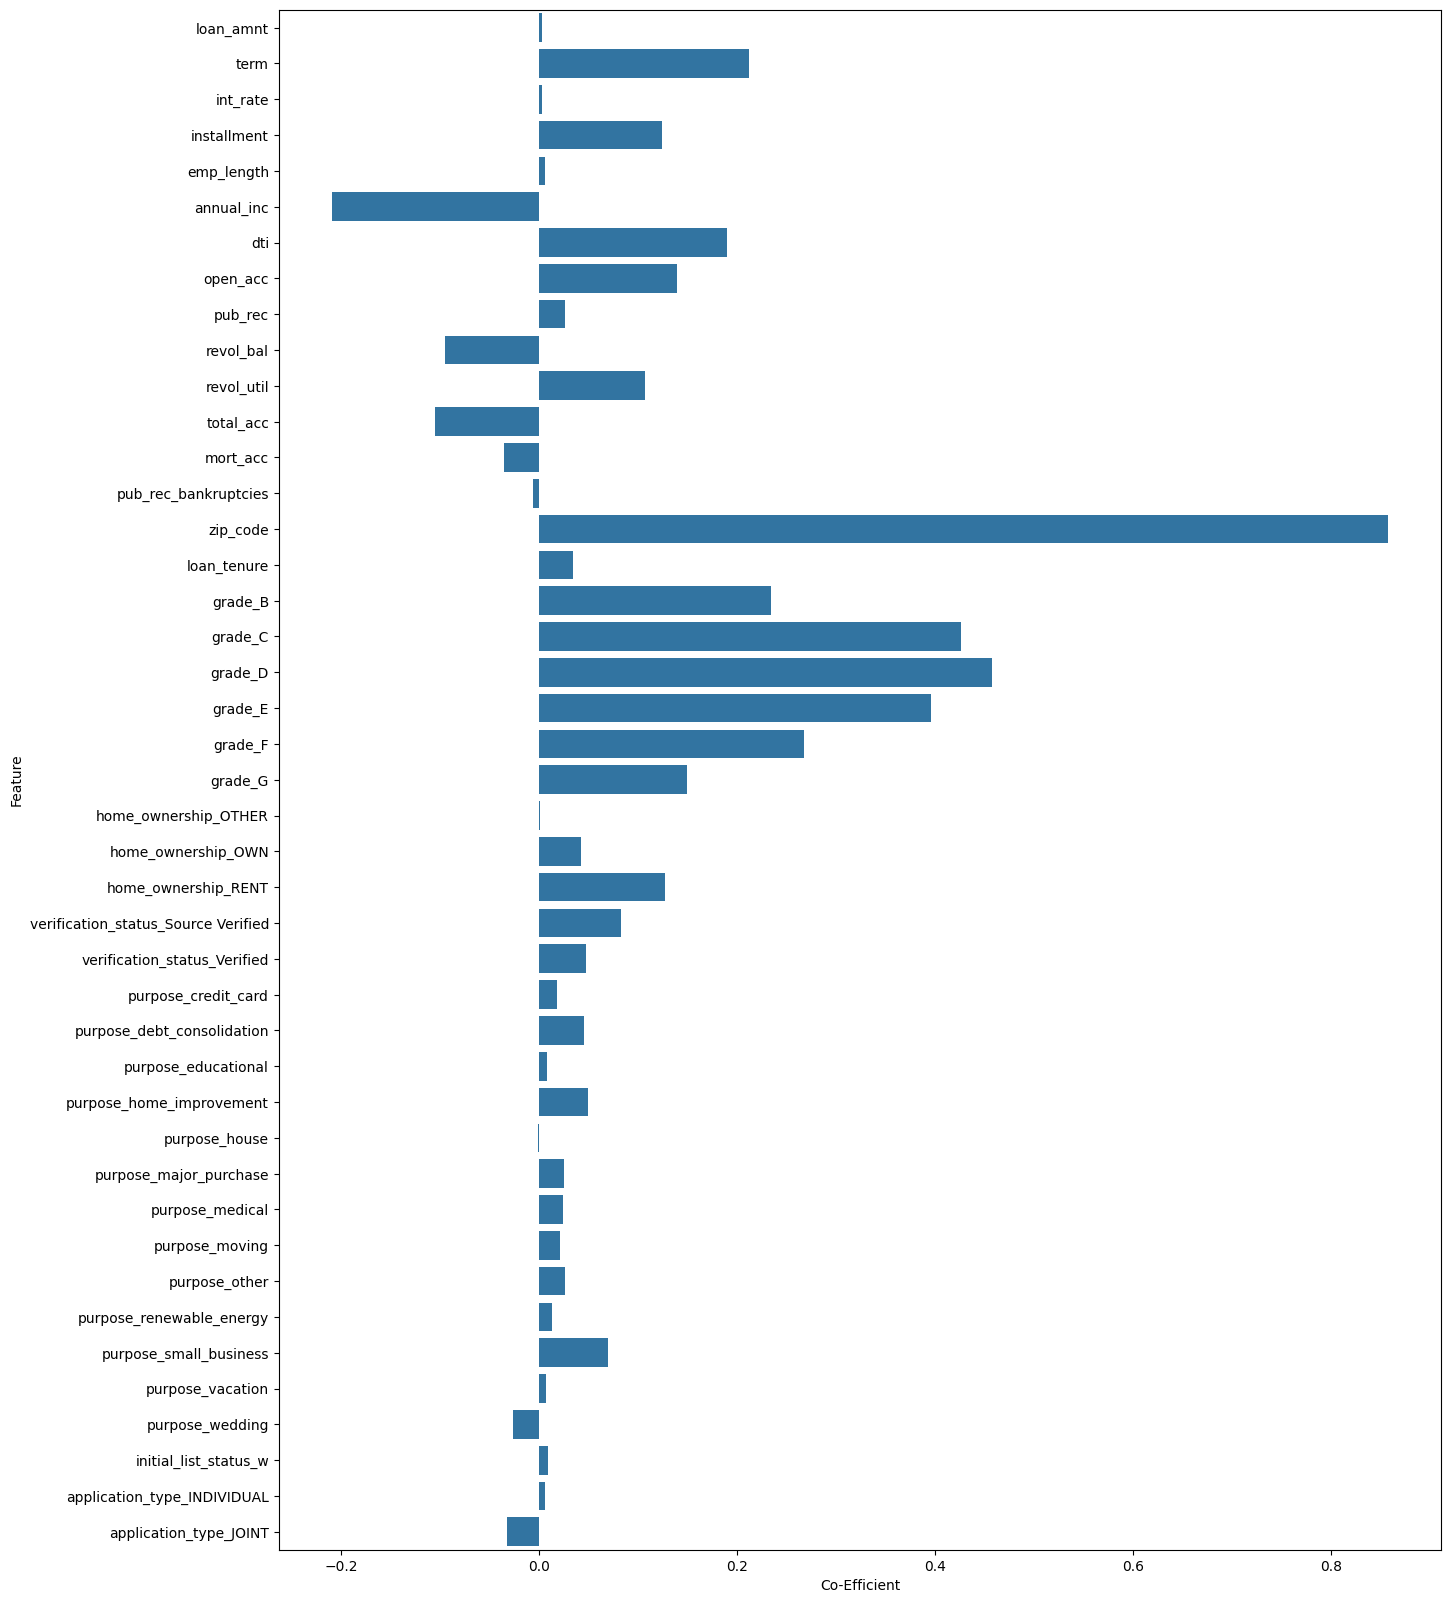

In [78]:
plt.figure(figsize = (15, 20))
sns.barplot(data = feature_coef, y = 'Feature', x = 'Co-Efficient')

* `ZIP_Code` and `grade` seem to be the most important features.
* However, `loan_amnt` and `int_rate` are least significant, which is contradictory to logical belief.

* **Variance-Inflation Factor** check to determine multicollinearity of independent features:

In [79]:
VIF_dict = {}

for i in X_train.columns:
  y = X_train[i]
  X = X_train.drop(i, axis = 1)
  lin_reg = LinearRegression()
  lin_reg.fit(X, y)
  VIF_i = 1 / (1 - lin_reg.score(X, y))
  VIF_dict[i] = VIF_i

In [80]:
VIF_score = pd.DataFrame(data = VIF_dict, index = ['VIF Scores']).T.reset_index().rename(columns = {'index': 'Features'}).sort_values(by = 'VIF Scores', ascending = False)
VIF_score

,Features,VIF Scores
0,loan_amnt,62.807606
3,installment,54.595135
28,purpose_debt_consolidation,21.169632
27,purpose_credit_card,15.063057
2,int_rate,12.553564
18,grade_D,9.743355
19,grade_E,8.622175
17,grade_C,7.532492
1,term,6.551988
30,purpose_home_improvement,5.805911


<Axes: xlabel='VIF Scores', ylabel='Features'>

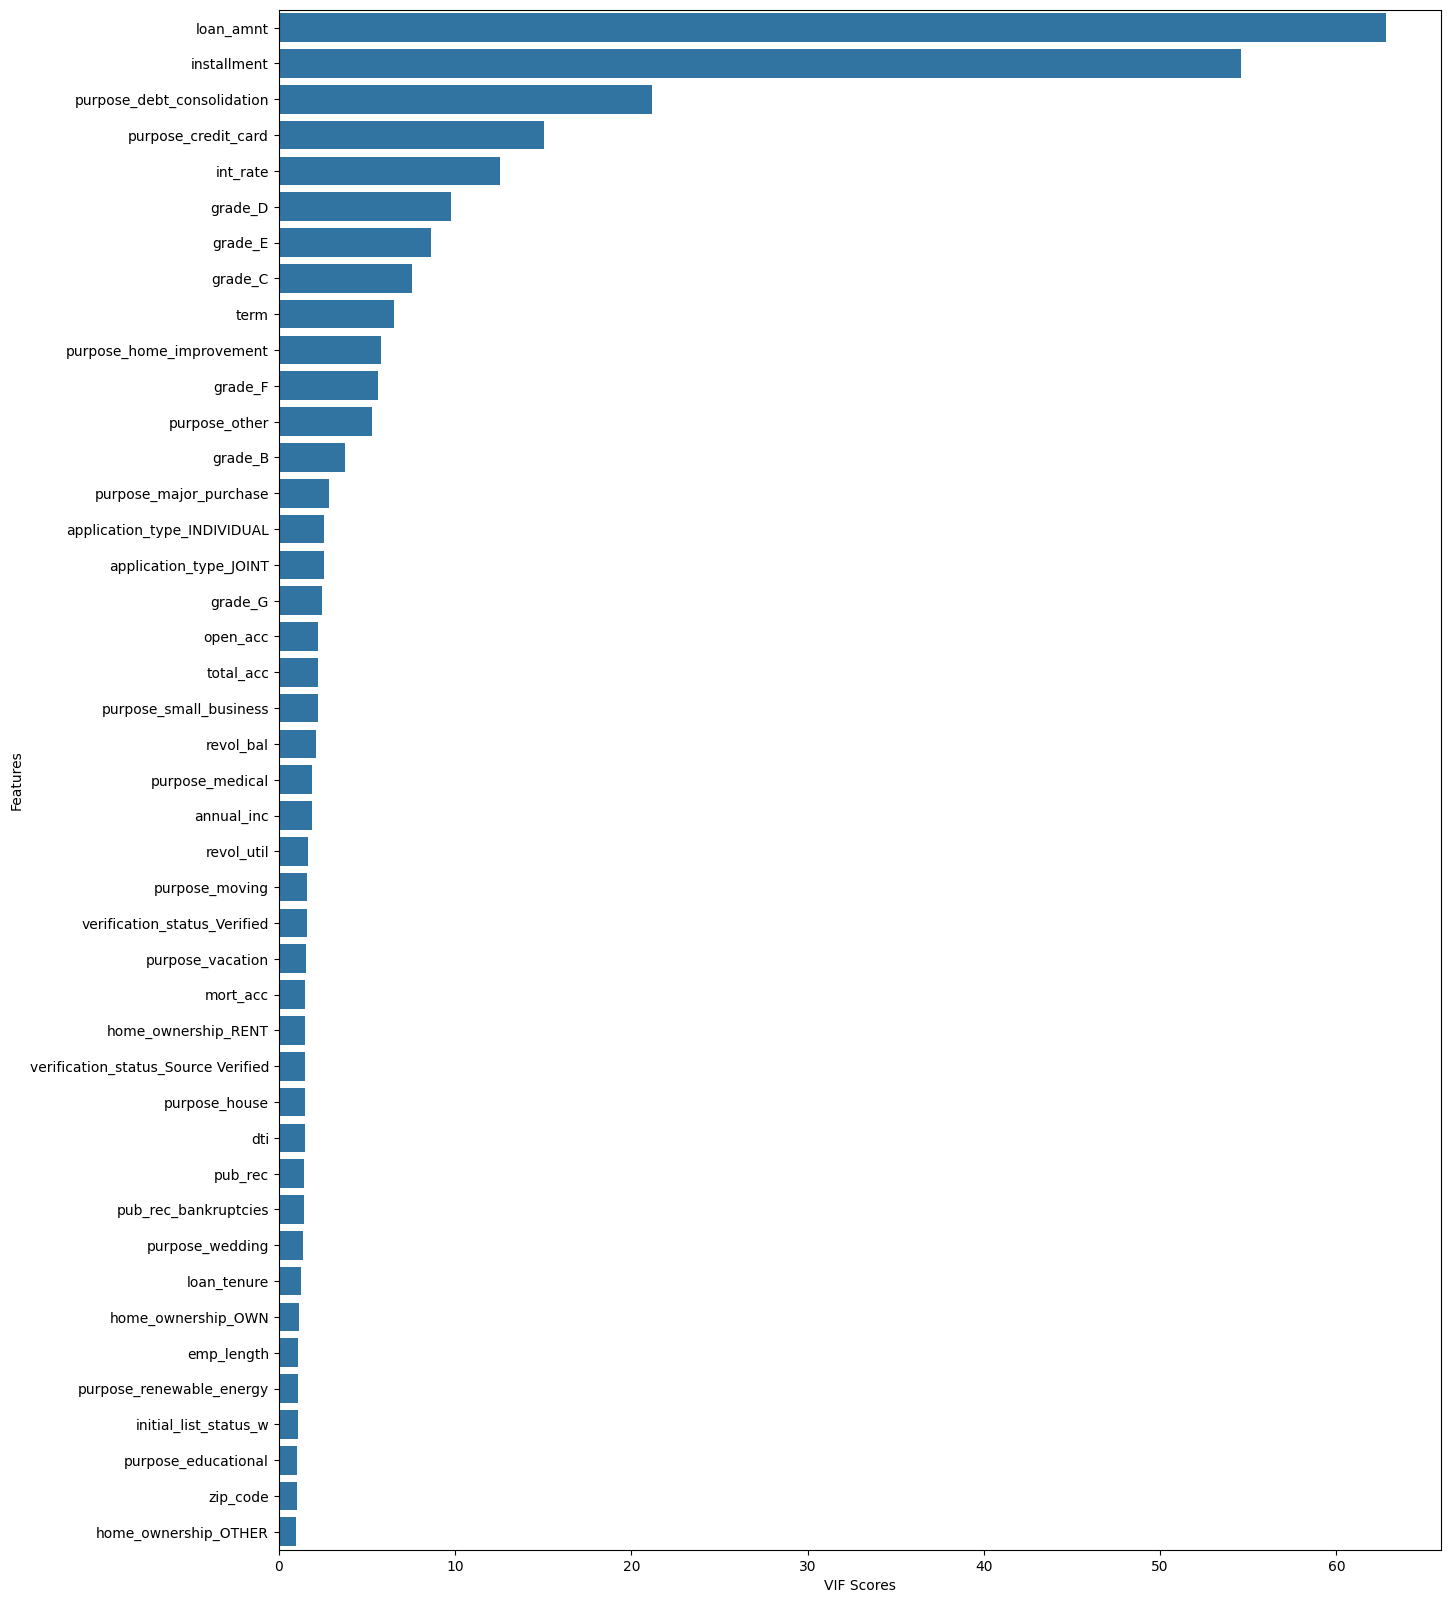

In [81]:
plt.figure(figsize = (15, 20))
sns.barplot(data = VIF_score, y = 'Features', x = 'VIF Scores')

* We can drop the features `loan_amnt`, `installment` and `int_rate` as they have very high VIF score (>>10) and train the model.

In [82]:
#loantap_clean = one_hot_loantap.drop(columns = ['sub_grade', 'emp_title', 'emp_length', 'issue_d', 'title', 'earliest_cr_line', 'revol_bal', 'pub_rec_bankruptcies', 'address', 'pincode'], axis = 1)
loantap_clean_postVIF = one_hot_loantap.drop(columns = ['loan_amnt', 'installment', 'int_rate', 'sub_grade', 'emp_title', 'issue_d', 'title', 'earliest_cr_line', 'address'], axis = 1)
loantap_clean_postVIF['loan_status'].replace({'Fully Paid': 0, 'Charged Off': 1}, inplace = True)

In [83]:
X = loantap_clean_postVIF.drop(columns = ['loan_status'], axis = 1)
y = loantap_clean_postVIF['loan_status']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 44)

In [85]:
sc = StandardScaler()
sc.fit(X_train)
X_train = pd.DataFrame(sc.fit_transform(X_train), columns = X_train.columns, index = y_train.index)
X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns, index = y_test.index)

In [86]:
log_reg = LogisticRegression(C = 1.0,  max_iter = 1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [87]:
y_train_pred = log_reg.predict(X_train)
y_pred = log_reg.predict(X_test)

In [88]:
accuracy = log_reg.score(X_train, y_train)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1_score_val = f1_score(y_train, y_train_pred)


training_data_metrics = pd.DataFrame(index = ['Accuracy','Precision', 'Recall', 'F1-Score'], data = [accuracy, precision, recall, f1_score_val], columns = ['Values']).reset_index()
training_data_metrics.rename(columns = {'index': 'Training Data Metrics'}, inplace = True)
training_data_metrics

,Training Data Metrics,Values
0,Accuracy,0.837894
1,Precision,0.695022
2,Recall,0.306945
3,F1-Score,0.425829


In [89]:
accuracy = log_reg.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score_val = f1_score(y_test, y_pred)


test_data_metrics = pd.DataFrame(index = ['Accuracy', 'Precision', 'Recall', 'F1-Score'], data = [accuracy, precision, recall, f1_score_val], columns = ['Values']).reset_index()
test_data_metrics.rename(columns = {'index': 'Test Data Metrics'}, inplace = True)
test_data_metrics

,Test Data Metrics,Values
0,Accuracy,0.835480
1,Precision,0.686771
2,Recall,0.305324
3,F1-Score,0.422717


* **Observation on the Performance for Class Imbalance**:

As we know there is a significant amount of Class Imbalance (80% Class 0 and 20% Class 1), the model is performing not upto the mark and we obtained F1-Score as **0.42**.

To improve the model performance, we can try to overcome the imbalance to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the **Synthetic Minority Oversampling Technique** (SMOTE).

In [90]:
smoteBalance = SMOTE(k_neighbors = 7)
X_smote, y_smote = smoteBalance.fit_resample(X_train, y_train)

In [91]:
print("Dimension of X:", X_smote.shape)
print("Dimension of y (target): ", y_smote.shape)

Dimension of X: (509554, 40)
Dimension of y (target):  (509554,)


In [92]:
log_reg_balanced = LogisticRegression(max_iter = 1000, class_weight = 'balanced', solver = 'newton-cholesky')

In [93]:
log_reg_balanced.fit(X_smote, y_smote)

LogisticRegression(class_weight='balanced', max_iter=1000,
                   solver='newton-cholesky')

In [94]:
y_train_pred_bal = log_reg_balanced.predict(X_smote)

In [95]:
y_pred_bal = log_reg_balanced.predict(X_test)

In [96]:
accuracy = log_reg_balanced.score(X_smote, y_smote)
precision = precision_score(y_smote, y_train_pred_bal)
recall = recall_score(y_smote, y_train_pred_bal)
f1_score_val = f1_score(y_smote, y_train_pred_bal)

training_data_metrics = pd.DataFrame(index = ['Accuracy','Precision', 'Recall', 'F1-Score'], data = [accuracy, precision, recall, f1_score_val], columns = ['Values']).reset_index()
training_data_metrics.rename(columns = {'index': 'Training Data Metrics'}, inplace = True)
training_data_metrics

,Training Data Metrics,Values
0,Accuracy,0.711703
1,Precision,0.717743
2,Recall,0.697834
3,F1-Score,0.707648


In [97]:
accuracy = log_reg_balanced.score(X_test, y_test)
precision = precision_score(y_test, y_pred_bal)
recall = recall_score(y_test, y_pred_bal)
f1_score_val = f1_score(y_test, y_pred_bal)

test_data_metrics = pd.DataFrame(index = ['Accuracy', 'Precision', 'Recall', 'F1-Score'], data = [accuracy, precision, recall, f1_score_val], columns = ['Values']).reset_index()
test_data_metrics.rename(columns = {'index': 'Test Data Metrics'}, inplace = True)
test_data_metrics

,Test Data Metrics,Values
0,Accuracy,0.719201
1,Precision,0.383189
2,Recall,0.694356
3,F1-Score,0.493844


In [98]:
print(classification_report(y_test, y_pred_bal))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81     63580
           1       0.38      0.69      0.49     15626

    accuracy                           0.72     79206
   macro avg       0.64      0.71      0.65     79206
weighted avg       0.80      0.72      0.74     79206



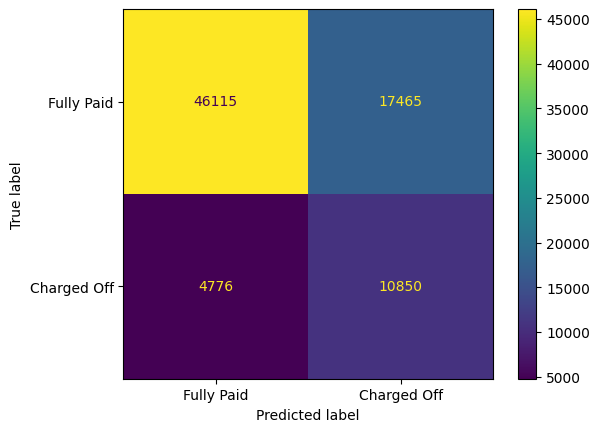

In [99]:
cnf_matrix = confusion_matrix(y_test, y_pred_bal)
ConfusionMatrixDisplay(cnf_matrix, display_labels = ['Fully Paid', 'Charged Off']).plot()

In [100]:
fp = np.round(cnf_matrix[0][1] / y_test.shape[0], 3)
fn = np.round(cnf_matrix[1][0] / y_test.shape[0], 3)
fp_fn = pd.DataFrame(index = ['False Positive', 'False Negative'], data = [fp*100, fn*100], columns = ['Percentage Values']).reset_index().rename(columns = {'index': 'Metric'})
fp_fn

,Metric,Percentage Values
0,False Positive,22.1
1,False Negative,6.0


* **ROC-AUC Curve:**

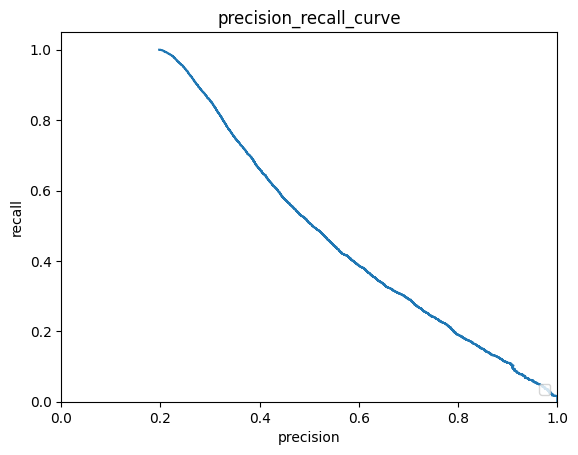

In [101]:
precision_recall_plot(y_test, log_reg_balanced.predict_proba(X_test)[:, 1])

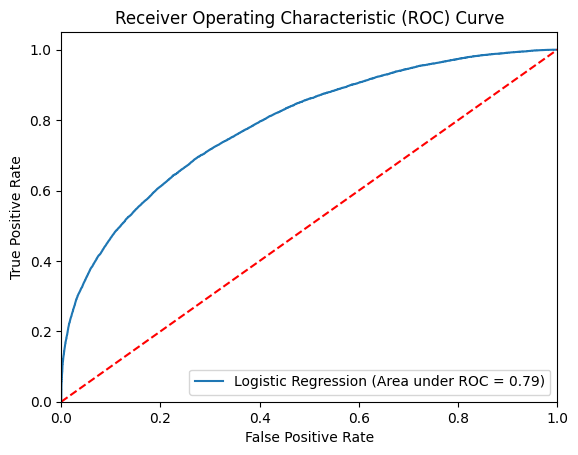

In [102]:
roc_curve_plot(y_test, log_reg_balanced.predict_proba(X_test)[:, 1])

In [118]:
coefficients = log_reg_balanced.coef_[0]
print("Feature Importance:")
for feature, coef in zip(X_test.columns, coefficients):
    print(f"{feature}: {coef}")

Feature Importance:
term: 0.21159627133705108
emp_length: 0.029404461643442598
annual_inc: -0.2064656755602151
dti: 0.19517351722758533
open_acc: 0.17964576533507853
pub_rec: 0.021434444341606382
revol_bal: -0.06387407147138144
revol_util: 0.12490417221625462
total_acc: -0.14553178195935934
mort_acc: -0.023713100519608274
pub_rec_bankruptcies: -0.004696370808136861
zip_code: 0.8265405698195211
loan_tenure: -0.002934745708536444
grade_B: 0.25260014545977844
grade_C: 0.44037272339089867
grade_D: 0.47378511012275504
grade_E: 0.41308633174026654
grade_F: 0.28098271458945634
grade_G: 0.15935341026352637
home_ownership_OTHER: -0.0009854710190924736
home_ownership_OWN: 0.037865694639691
home_ownership_RENT: 0.11257017186682666
verification_status_Source Verified: 0.10369608958135648
verification_status_Verified: 0.08028632924275456
purpose_credit_card: 0.20100936430298696
purpose_debt_consolidation: 0.28102953863208396
purpose_educational: 0.0176754804441327
purpose_home_improvement: 0.159253

* **Observation:**

1. After incorporating **SMOTE** to overcome Class Imbalance, the Recall and F1-Score have slightly improved to 70.7% and 49.3% respectively. As training data gives better result the model might overfitted.
2. However, it has increased count of False Positives, which we is not affordable.
3. The ROC-AUC Curve remain same with that of the imbalance data.

* **Actionable Insights & Recommendations:**

1. We should try to keep the **Precision** as higher as possible compare to recall , as our target is to keep very low **False Positives**, because we cannot afford missing a potential customer to provide a loan to get the maximum profit from the interest the person will be paying. However, on the other side, conventional banks try to enhance **Precision** as they can not afford defaulters at all, which will lead to the extreme loss of that institution.

2. It will help not to missout the opportunity to finance more individuals and earn interest on it. This we can achieve by setting up the higher threshold.

3. Giving loans to those even having slightly higher probability of defaulter, we can maximize the earning by taking more risk.

4. Since Non-Performing Asset (NPA) is a real problem in the industry, LoanTap should more investigate and check for the proof of assets. It is evident that Verified borrowers had higher probability of defaulters than that of Not-Verified.

5. Giving loans to those who have no mortgage house of any owned property have higher probability of being defaulter, giving loan to this category borrowers can be a problem of NPA.
